In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline

In [2]:
numIter = 10000
# Инициализируем переменные
w1 = 0.1
w2 = 0.2
w3 = 0.3
w4 = 0.4
w5 = 0.5
w6 = 0.6
w7 = 0.7
w8 = 0.8
w9 = 0.9
w10 = 0.1
wList = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10]
b1 = 0.5
b2 = 0.5
bList = [b1, b2]
# Входные и целевые переменные
x1 = 1
x2 = 4
x3 = 5
xList = [x1, x2, x3]
t1 = 0.1
t2 = 0.05
tList = [t1, t2]
# Установим скорость обучения
alpha = 0.01

In [3]:
def sigmoid(x): 
    return np.divide (1, (1 + np.exp(-x)))

In [4]:
def forwardProp(xList, wlist, blist):
    zh1 = wList[0] * xList[0] + wList[2] * xList[1] + wlist[4] * xList[2] + blist[0]
    zh2 = wList[1] * xList[0] + wList[3] * xList[1] + wList[5] * xList[2] + blist[0]
    h1 = sigmoid(zh1)
    h2 = sigmoid(zh2)
    zo1 = wList[6] * h1 + wList[8] * h2 + blist[1]
    zo2 = wList[7] * h1 + wList[9] * h2 + blist[1]
    o1 = sigmoid (zo1)
    o2 = sigmoid(zo2)
    return h1, h2, o1, o2

In [5]:
def error (oList, tList): 
    return 0.5 * (np.power(oList[0] - tList[0], 2) + np.power (oList[1] - tList[1], 2))

In [7]:
errList = []
for i in range (numIter): 
    # Прямое распространение (Forward propagation)
    h1, h2, o1, o2 = forwardProp(xList, wList, bList)
    # Рассчитаем ошибку
    sse = error([o1, o2], tList)
    errList.append(sse)
    
    print('Running' + str(i + 1) + ' of ' + str(numIter))
    print('o1: ' + str(o1))
    print('t1: ' + str(t1))
    print('02: ' + str(o2))
    print('t2: ' + str(t2))
    print('error: ' + str(sse))
    print('')
    
    # Вычисление производных ошибки (Error derivative)
    # Вычислим dE_dw7
    dE_do1 = o1 - t1
    do1_dzo1 = o1 * (1-o1)
    dzo1_dw7 = h1
    dE_dw7 = dE_do1 * do1_dzo1 * dzo1_dw7
    # Вычислим dE_dw8
    dE_do2 = o2 - t2
    do2_dzo2 = o2 * (1-o2)
    dzo2_dw8 = h1
    dE_dw8 = dE_do2 * do2_dzo2 * dzo2_dw8
    # Вычислим dE_dw9
    dzo1_dw9 = h2
    dE_dw9 = dE_do1 * do1_dzo1 * dzo1_dw9
    # Вычислим dE_dw10
    dzo2_dw10 = h2
    dE_dw10 = dE_do2 * do2_dzo2 * dzo2_dw10
    
    # Вычислим dE_db2
    dzo1_db2 = 1 
    dzo2_db2 = 1
    dE_db2 = dE_do1 * do1_dzo1 * dzo1_db2 + dE_do2 * do2_dzo2 * dzo2_db2
    # Сначала вычислим dE_dhl 
    dzo1_dh1= w7
    dzo2_dh1= w8
    dE_dh1 = dE_do1 * do1_dzo1 * dzo1_dh1 + dE_do2 * do2_dzo2 * dzo2_dh1
    # Вычислим dE_dw1
    dh1_dzh1 =h1 * (1 - h1)
    dzh1_dw1= x1
    dE_dw1 = dE_dh1 * dh1_dzh1 * dzh1_dw1
    # Вычислим dE_dw3
    dzh1_dw3 = x2
    dE_dw3 = dE_dh1* dh1_dzh1 * dzh1_dw3 
    # Вычислим dE_dw5
    dzh1_dw5 = x3
    dE_dw5 = dE_dh1 * dh1_dzh1 * dzh1_dw5
    # Вычислим dE_dh2 first
    dzo1_dh2= w9
    dzo2_dh2 = w10
    dE_dh2 = dE_do1 * do1_dzo1 * dzo1_dh2 + dE_do2 * do2_dzo2 * dzo2_dh2
    # Вычислим dE_dw2
    dh2_dzh2 = h2 * (1 - h2)
    dzh2_dw2 = x1
    dE_dw2 = dE_dh2 * dh2_dzh2 * dzh2_dw2
    # Вычислим dE_dw4
    dzh2_dw4 = x2
    dE_dw4 = dE_dh2 * dh2_dzh2 * dzh2_dw4 
    # Вычислим dE_dw6
    dzh2_dw6 = x3
    dE_dw6 = dE_dh2 * dh2_dzh2 * dzh2_dw6
    # Вычислим dE_db1
    dzh1_db1 = 1
    dzh2_db1 = 1
    term1 = dE_do1 * do1_dzo1 * dzo1_dh1 * dh1_dzh1 * dzh1_db1
    term2 = dE_do2 * do2_dzo2 * dzo2_dh2 * dh2_dzh2 * dzh2_db1
    dE_db1 = term1 + term2
    
    # Пересчитаем все параметры
    w1 = w1 - alpha * dE_dw1
    w2 = w2 - alpha * dE_dw2
    w3 = w3 - alpha * dE_dw3
    w4 = w4 - alpha * dE_dw4
    w5 = w5 - alpha * dE_dw5
    w6 = w6 - alpha * dE_dw6
    w7 = w7 - alpha * dE_dw7
    w8 = w8 - alpha * dE_dw8
    w9 = w9 - alpha * dE_dw9
    w10 = w10 - alpha * dE_dw10
    b1 = b1 - alpha * dE_db1
    b2 = b2 - alpha * dE_db2
    wList = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10]
    bList = [b1, b2]

Running1 of 10000
o1: 0.10026215025123036
t1: 0.1
02: 0.06452679642034873
t2: 0.05
error: 0.0001055482684962383

Running2 of 10000
o1: 0.10026129523597285
t1: 0.1
02: 0.06452521780998435
t2: 0.05
error: 0.00010552511381391434

Running3 of 10000
o1: 0.1002604405374199
t1: 0.1
02: 0.06452363948784504
t2: 0.05
error: 0.00010550196662321155

Running4 of 10000
o1: 0.10025958615546218
t1: 0.1
02: 0.06452206145384984
t2: 0.05
error: 0.00010547882692074941

Running5 of 10000
o1: 0.10025873208999032
t1: 0.1
02: 0.06452048370791771
t2: 0.05
error: 0.00010545569470314722

Running6 of 10000
o1: 0.10025787834089497
t1: 0.1
02: 0.0645189062499676
t2: 0.05
error: 0.00010543256996702548

Running7 of 10000
o1: 0.10025702490806686
t1: 0.1
02: 0.06451732907991861
t2: 0.05
error: 0.00010540945270900862

Running8 of 10000
o1: 0.10025617179139681
t1: 0.1
02: 0.06451575219768979
t2: 0.05
error: 0.00010538634292572168

Running9 of 10000
o1: 0.10025531899077557
t1: 0.1
02: 0.0645141756032002
t2: 0.05
error: 0.

t1: 0.1
02: 0.06441231031114306
t2: 0.05
error: 0.00010387745634483214

Running75 of 10000
o1: 0.10019972749868353
t1: 0.1
02: 0.0644107525300863
t2: 0.05
error: 0.00010385483977855943

Running76 of 10000
o1: 0.10019889562683987
t1: 0.1
02: 0.06440919503141714
t2: 0.05
error: 0.0001038322304618961

Running77 of 10000
o1: 0.10019806406371994
t1: 0.1
02: 0.06440763781505665
t2: 0.05
error: 0.00010380962839159379

Running78 of 10000
o1: 0.10019723280921751
t1: 0.1
02: 0.0644060808809261
t2: 0.05
error: 0.00010378703356440814

Running79 of 10000
o1: 0.1001964018632263
t1: 0.1
02: 0.06440452422894663
t2: 0.05
error: 0.00010376444597709459

Running80 of 10000
o1: 0.10019557122564024
t1: 0.1
02: 0.06440296785903948
t2: 0.05
error: 0.00010374186562641138

Running81 of 10000
o1: 0.10019474089635305
t1: 0.1
02: 0.06440141177112592
t2: 0.05
error: 0.00010371929250911825

Running82 of 10000
o1: 0.1001939108752587
t1: 0.1
02: 0.06439985596512719
t2: 0.05
error: 0.00010369672662197635

Running83 of 

Running187 of 10000
o1: 0.10010845291204529
t1: 0.1
02: 0.06423804972481109
t2: 0.05
error: 0.00010136691100016211

Running188 of 10000
o1: 0.10010765496599394
t1: 0.1
02: 0.0642365233613584
t2: 0.05
error: 0.00010134509350510336

Running189 of 10000
o1: 0.10010685731701696
t1: 0.1
02: 0.06423499727156597
t2: 0.05
error: 0.00010132328290384524

Running190 of 10000
o1: 0.10010605996501272
t1: 0.1
02: 0.06423347145535821
t2: 0.05
error: 0.00010130147919333769

Running191 of 10000
o1: 0.10010526290987941
t1: 0.1
02: 0.0642319459126595
t2: 0.05
error: 0.00010127968237053087

Running192 of 10000
o1: 0.10010446615151537
t1: 0.1
02: 0.06423042064339433
t2: 0.05
error: 0.00010125789243237798

Running193 of 10000
o1: 0.10010366968981899
t1: 0.1
02: 0.06422889564748716
t2: 0.05
error: 0.000101236109375833

Running194 of 10000
o1: 0.10010287352468866
t1: 0.1
02: 0.06422737092486247
t2: 0.05
error: 0.00010121433319785189

Running195 of 10000
o1: 0.10010207765602289
t1: 0.1
02: 0.06422584647544488


o1: 0.10004709754954022
t1: 0.1
02: 0.0641198094651767
t2: 0.05
error: 9.968561875603311e-05

Running266 of 10000
o1: 0.10004632247270584
t1: 0.1
02: 0.06411830422229375
t2: 0.05
error: 9.966432994235756e-05

Running267 of 10000
o1: 0.10004554768512612
t1: 0.1
02: 0.06411679924725702
t2: 0.05
error: 9.964304778948836e-05

Running268 of 10000
o1: 0.10004477318670231
t1: 0.1
02: 0.064115294539993
t2: 0.05
error: 9.962177229450177e-05

Running269 of 10000
o1: 0.10004399897733578
t1: 0.1
02: 0.06411379010042828
t2: 0.05
error: 9.960050345447693e-05

Running270 of 10000
o1: 0.10004322505692785
t1: 0.1
02: 0.06411228592848946
t2: 0.05
error: 9.957924126649393e-05

Running271 of 10000
o1: 0.10004245142537982
t1: 0.1
02: 0.06411078202410317
t2: 0.05
error: 9.95579857276349e-05

Running272 of 10000
o1: 0.10004167808259322
t1: 0.1
02: 0.06410927838719607
t2: 0.05
error: 9.953673683498339e-05

Running273 of 10000
o1: 0.10004090502846946
t1: 0.1
02: 0.06410777501769484
t2: 0.05
error: 9.9515494585

Running342 of 10000
o1: 0.0999882558208515
t1: 0.1
02: 0.06400468414403826
t2: 0.05
error: 9.806565795001022e-05

Running343 of 10000
o1: 0.09998750273047342
t1: 0.1
02: 0.06400319931233488
t2: 0.05
error: 9.804487358136076e-05

Running344 of 10000
o1: 0.09998674992185695
t1: 0.1
02: 0.06400171474289962
t2: 0.05
error: 9.802409565305162e-05

Running345 of 10000
o1: 0.09998599739490624
t1: 0.1
02: 0.06400023043566105
t2: 0.05
error: 9.800332416227972e-05

Running346 of 10000
o1: 0.09998524514952539
t1: 0.1
02: 0.06399874639054783
t2: 0.05
error: 9.79825591062441e-05

Running347 of 10000
o1: 0.0999844931856187
t1: 0.1
02: 0.06399726260748856
t2: 0.05
error: 9.79618004821448e-05

Running348 of 10000
o1: 0.09998374150309033
t1: 0.1
02: 0.06399577908641194
t2: 0.05
error: 9.79410482871837e-05

Running349 of 10000
o1: 0.09998299010184461
t1: 0.1
02: 0.06399429582724663
t2: 0.05
error: 9.792030251856373e-05

Running350 of 10000
o1: 0.09998223898178579
t1: 0.1
02: 0.06399281282992134
t2: 0.05


Running431 of 10000
o1: 0.09992232335704597
t1: 0.1
02: 0.06387355311775664
t2: 0.05
error: 9.624075488603771e-05

Running432 of 10000
o1: 0.09992159497214231
t1: 0.1
02: 0.06387209135119984
t2: 0.05
error: 9.622053290221333e-05

Running433 of 10000
o1: 0.0999208668606093
t1: 0.1
02: 0.06387062984065632
t2: 0.05
error: 9.620031711512768e-05

Running434 of 10000
o1: 0.09992013902235422
t1: 0.1
02: 0.0638691685860569
t2: 0.05
error: 9.618010752210902e-05

Running435 of 10000
o1: 0.09991941145728445
t1: 0.1
02: 0.06386770758733253
t2: 0.05
error: 9.615990412048852e-05

Running436 of 10000
o1: 0.0999186841653074
t1: 0.1
02: 0.06386624684441403
t2: 0.05
error: 9.613970690759681e-05

Running437 of 10000
o1: 0.09991795714633046
t1: 0.1
02: 0.06386478635723246
t2: 0.05
error: 9.611951588076873e-05

Running438 of 10000
o1: 0.09991723040026111
t1: 0.1
02: 0.06386332612571868
t2: 0.05
error: 9.609933103733753e-05

Running439 of 10000
o1: 0.09991650392700685
t1: 0.1
02: 0.06386186614980373
t2: 0.0

t2: 0.05
error: 9.376019663198832e-05

Running557 of 10000
o1: 0.09983266983337136
t1: 0.1
02: 0.0636913643802165
t2: 0.05
error: 9.374072898826248e-05

Running558 of 10000
o1: 0.09983197517458711
t1: 0.1
02: 0.06368993433492544
t2: 0.05
error: 9.372126721826267e-05

Running559 of 10000
o1: 0.09983128077776722
t1: 0.1
02: 0.06368850453713015
t2: 0.05
error: 9.370181131949178e-05

Running560 of 10000
o1: 0.09983058664282331
t1: 0.1
02: 0.06368707498676456
t2: 0.05
error: 9.368236128945288e-05

Running561 of 10000
o1: 0.099829892769667
t1: 0.1
02: 0.0636856456837626
t2: 0.05
error: 9.36629171256507e-05

Running562 of 10000
o1: 0.09982919915821001
t1: 0.1
02: 0.06368421662805826
t2: 0.05
error: 9.364347882559114e-05

Running563 of 10000
o1: 0.09982850580836398
t1: 0.1
02: 0.0636827878195855
t2: 0.05
error: 9.362404638678109e-05

Running564 of 10000
o1: 0.09982781272004078
t1: 0.1
02: 0.06368135925827845
t2: 0.05
error: 9.360461980673052e-05

Running565 of 10000
o1: 0.09982711989315213
t1:

Running637 of 10000
o1: 0.0997779177286587
t1: 0.1
02: 0.06357773745258921
t2: 0.05
error: 9.22021374333439e-05

Running638 of 10000
o1: 0.09977724375043814
t1: 0.1
02: 0.06357632700011329
t2: 0.05
error: 9.21831375803619e-05

Running639 of 10000
o1: 0.09977657002721496
t1: 0.1
02: 0.06357491678992162
t2: 0.05
error: 9.216414340301732e-05

Running640 of 10000
o1: 0.09977589655890337
t1: 0.1
02: 0.06357350682195004
t2: 0.05
error: 9.214515489891774e-05

Running641 of 10000
o1: 0.09977522334541766
t1: 0.1
02: 0.06357209709613433
t2: 0.05
error: 9.212617206567154e-05

Running642 of 10000
o1: 0.09977455038667207
t1: 0.1
02: 0.06357068761241039
t2: 0.05
error: 9.210719490088919e-05

Running643 of 10000
o1: 0.09977387768258095
t1: 0.1
02: 0.06356927837071404
t2: 0.05
error: 9.208822340218132e-05

Running644 of 10000
o1: 0.09977320523305867
t1: 0.1
02: 0.06356786937098116
t2: 0.05
error: 9.206925756716032e-05

Running645 of 10000
o1: 0.09977253303801954
t1: 0.1
02: 0.06356646061314768
t2: 0.0

02: 0.06345453810597422
t2: 0.05
error: 9.055161707092227e-05

Running726 of 10000
o1: 0.09971892257304771
t1: 0.1
02: 0.06345314873121277
t2: 0.05
error: 9.053310765203692e-05

Running727 of 10000
o1: 0.09971827095728641
t1: 0.1
02: 0.06345175959317169
t2: 0.05
error: 9.05146037029974e-05

Running728 of 10000
o1: 0.09971761958901185
t1: 0.1
02: 0.06345037069178874
t2: 0.05
error: 9.049610522151967e-05

Running729 of 10000
o1: 0.09971696846814107
t1: 0.1
02: 0.06344898202700168
t2: 0.05
error: 9.047761220532027e-05

Running730 of 10000
o1: 0.09971631759459111
t1: 0.1
02: 0.06344759359874833
t2: 0.05
error: 9.045912465211771e-05

Running731 of 10000
o1: 0.09971566696827908
t1: 0.1
02: 0.06344620540696655
t2: 0.05
error: 9.0440642559632e-05

Running732 of 10000
o1: 0.09971501658912205
t1: 0.1
02: 0.06344481745159417
t2: 0.05
error: 9.04221659255833e-05

Running733 of 10000
o1: 0.09971436645703716
t1: 0.1
02: 0.06344342973256903
t2: 0.05
error: 9.040369474769322e-05

Running734 of 10000
o


Running827 of 10000
o1: 0.09965434548365197
t1: 0.1
02: 0.06331403063342741
t2: 0.05
error: 8.869144437625766e-05

Running828 of 10000
o1: 0.09965371845002556
t1: 0.1
02: 0.06331266508729311
t2: 0.05
error: 8.867348131914271e-05

Running829 of 10000
o1: 0.09965309165565696
t1: 0.1
02: 0.0633112997716425
t2: 0.05
error: 8.865552350495224e-05

Running830 of 10000
o1: 0.09965246510046614
t1: 0.1
02: 0.06330993468641559
t2: 0.05
error: 8.863757093152139e-05

Running831 of 10000
o1: 0.09965183878437321
t1: 0.1
02: 0.06330856983155234
t2: 0.05
error: 8.861962359668582e-05

Running832 of 10000
o1: 0.09965121270729829
t1: 0.1
02: 0.06330720520699272
t2: 0.05
error: 8.860168149828214e-05

Running833 of 10000
o1: 0.09965058686916145
t1: 0.1
02: 0.06330584081267675
t2: 0.05
error: 8.858374463414826e-05

Running834 of 10000
o1: 0.09964996126988288
t1: 0.1
02: 0.0633044766485445
t2: 0.05
error: 8.856581300212384e-05

Running835 of 10000
o1: 0.09964933590938284
t1: 0.1
02: 0.063303112714536
t2: 0.0

Running946 of 10000
o1: 0.09958138664840599
t1: 0.1
02: 0.06315313259303192
t2: 0.05
error: 8.659006707400559e-05

Running947 of 10000
o1: 0.09958078753302511
t1: 0.1
02: 0.06315179405855569
t2: 0.05
error: 8.657271302556387e-05

Running948 of 10000
o1: 0.09958018864758997
t1: 0.1
02: 0.0631504557475626
t2: 0.05
error: 8.65553639701073e-05

Running949 of 10000
o1: 0.09957958999202396
t1: 0.1
02: 0.06314911765999512
t2: 0.05
error: 8.653801990560092e-05

Running950 of 10000
o1: 0.0995789915662506
t1: 0.1
02: 0.06314777979579562
t2: 0.05
error: 8.652068083000985e-05

Running951 of 10000
o1: 0.0995783933701934
t1: 0.1
02: 0.06314644215490656
t2: 0.05
error: 8.650334674130048e-05

Running952 of 10000
o1: 0.09957779540377586
t1: 0.1
02: 0.06314510473727032
t2: 0.05
error: 8.648601763743968e-05

Running953 of 10000
o1: 0.09957719766692157
t1: 0.1
02: 0.0631437675428295
t2: 0.05
error: 8.646869351639728e-05

Running954 of 10000
o1: 0.09957660015955411
t1: 0.1
02: 0.06314243057152649
t2: 0.05


error: 8.435846874335925e-05

Running1078 of 10000
o1: 0.09950426318109046
t1: 0.1
02: 0.0629783569316105
t2: 0.05
error: 8.434175181895235e-05

Running1079 of 10000
o1: 0.09950369376697693
t1: 0.1
02: 0.06297704740617811
t2: 0.05
error: 8.432503962956579e-05

Running1080 of 10000
o1: 0.09950312457294075
t1: 0.1
02: 0.06297573809679347
t2: 0.05
error: 8.430833217329627e-05

Running1081 of 10000
o1: 0.09950255559890898
t1: 0.1
02: 0.06297442900340147
t2: 0.05
error: 8.429162944824103e-05

Running1082 of 10000
o1: 0.09950198684480864
t1: 0.1
02: 0.06297312012594712
t2: 0.05
error: 8.427493145249891e-05

Running1083 of 10000
o1: 0.09950141831056684
t1: 0.1
02: 0.06297181146437539
t2: 0.05
error: 8.425823818416935e-05

Running1084 of 10000
o1: 0.09950084999611068
t1: 0.1
02: 0.0629705030186313
t2: 0.05
error: 8.424154964135318e-05

Running1085 of 10000
o1: 0.09950028190136724
t1: 0.1
02: 0.06296919478865987
t2: 0.05
error: 8.422486582215164e-05

Running1086 of 10000
o1: 0.09949971402626372


Running1186 of 10000
o1: 0.09944402330504921
t1: 0.1
02: 0.06283816536937223
t2: 0.05
error: 8.256380006833835e-05

Running1187 of 10000
o1: 0.0994434772429449
t1: 0.1
02: 0.06283687886280173
t2: 0.05
error: 8.254758825868301e-05

Running1188 of 10000
o1: 0.0994429313931862
t1: 0.1
02: 0.06283559256644046
t2: 0.05
error: 8.253138098217949e-05

Running1189 of 10000
o1: 0.09944238575570293
t1: 0.1
02: 0.06283430648023529
t2: 0.05
error: 8.251517823702622e-05

Running1190 of 10000
o1: 0.09944184033042495
t1: 0.1
02: 0.06283302060413332
t2: 0.05
error: 8.249898002142515e-05

Running1191 of 10000
o1: 0.0994412951172821
t1: 0.1
02: 0.06283173493808136
t2: 0.05
error: 8.248278633357533e-05

Running1192 of 10000
o1: 0.0994407501162042
t1: 0.1
02: 0.06283044948202648
t2: 0.05
error: 8.246659717167963e-05

Running1193 of 10000
o1: 0.09944020532712122
t1: 0.1
02: 0.06282916423591571
t2: 0.05
error: 8.245041253394106e-05

Running1194 of 10000
o1: 0.09943966074996305
t1: 0.1
02: 0.0628278791996960

02: 0.06272828872629681
t2: 0.05
error: 8.118597072869494e-05

Running1273 of 10000
o1: 0.09939730290170168
t1: 0.1
02: 0.06272702010559231
t2: 0.05
error: 8.117014228022399e-05

Running1274 of 10000
o1: 0.09939677505368934
t1: 0.1
02: 0.06272575169059845
t2: 0.05
error: 8.115431821331037e-05

Running1275 of 10000
o1: 0.09939624741200812
t1: 0.1
02: 0.06272448348126362
t2: 0.05
error: 8.113849852622884e-05

Running1276 of 10000
o1: 0.0993957199765899
t1: 0.1
02: 0.0627232154775364
t2: 0.05
error: 8.11226832172571e-05

Running1277 of 10000
o1: 0.09939519274736672
t1: 0.1
02: 0.06272194767936518
t2: 0.05
error: 8.110687228467135e-05

Running1278 of 10000
o1: 0.09939466572427057
t1: 0.1
02: 0.0627206800866985
t2: 0.05
error: 8.109106572675024e-05

Running1279 of 10000
o1: 0.09939413890723345
t1: 0.1
02: 0.06271941269948489
t2: 0.05
error: 8.107526354177284e-05

Running1280 of 10000
o1: 0.09939361229618737
t1: 0.1
02: 0.0627181455176729
t2: 0.05
error: 8.10594657280191e-05

Running1281 of 


Running1356 of 10000
o1: 0.09935418745270244
t1: 0.1
02: 0.06262243681611782
t2: 0.05
error: 7.987149251156668e-05

Running1357 of 10000
o1: 0.09935367650078807
t1: 0.1
02: 0.06262118529705633
t2: 0.05
error: 7.985602618413223e-05

Running1358 of 10000
o1: 0.09935316574963768
t1: 0.1
02: 0.0626199339794354
t2: 0.05
error: 7.984056409637493e-05

Running1359 of 10000
o1: 0.09935265519918526
t1: 0.1
02: 0.06261868286320489
t2: 0.05
error: 7.98251062466413e-05

Running1360 of 10000
o1: 0.09935214484936472
t1: 0.1
02: 0.06261743194831478
t2: 0.05
error: 7.98096526332795e-05

Running1361 of 10000
o1: 0.0993516347001101
t1: 0.1
02: 0.06261618123471495
t2: 0.05
error: 7.979420325463743e-05

Running1362 of 10000
o1: 0.09935112475135528
t1: 0.1
02: 0.06261493072235531
t2: 0.05
error: 7.977875810906383e-05

Running1363 of 10000
o1: 0.09935061500303437
t1: 0.1
02: 0.06261368041118587
t2: 0.05
error: 7.976331719490904e-05

Running1364 of 10000
o1: 0.09935010545508134
t1: 0.1
02: 0.0626124303011565

t1: 0.1
02: 0.062488426539004965
t2: 0.05
error: 7.822529281564179e-05

Running1465 of 10000
o1: 0.09929966164760372
t1: 0.1
02: 0.06248719648934854
t2: 0.05
error: 7.821027498571782e-05

Running1466 of 10000
o1: 0.09929917219487522
t1: 0.1
02: 0.06248596663581577
t2: 0.05
error: 7.81952612215703e-05

Running1467 of 10000
o1: 0.09929868293584347
t1: 0.1
02: 0.06248473697835824
t2: 0.05
error: 7.818025152163136e-05

Running1468 of 10000
o1: 0.09929819387044506
t1: 0.1
02: 0.06248350751692764
t2: 0.05
error: 7.816524588433486e-05

Running1469 of 10000
o1: 0.09929770499861634
t1: 0.1
02: 0.0624822782514757
t2: 0.05
error: 7.815024430811579e-05

Running1470 of 10000
o1: 0.09929721632029376
t1: 0.1
02: 0.06248104918195403
t2: 0.05
error: 7.81352467914084e-05

Running1471 of 10000
o1: 0.09929672783541381
t1: 0.1
02: 0.06247982030831444
t2: 0.05
error: 7.812025333264963e-05

Running1472 of 10000
o1: 0.09929623954391299
t1: 0.1
02: 0.06247859163050864
t2: 0.05
error: 7.810526393027599e-05

Run

t1: 0.1
02: 0.06239428305823707
t2: 0.05
error: 7.708070277894391e-05

Running1542 of 10000
o1: 0.09926253592297861
t1: 0.1
02: 0.06239306796980296
t2: 0.05
error: 7.706599348452647e-05

Running1543 of 10000
o1: 0.09926206120046643
t1: 0.1
02: 0.062391853073816256
t2: 0.05
error: 7.705128813745319e-05

Running1544 of 10000
o1: 0.09926158666681938
t1: 0.1
02: 0.06239063837022983
t2: 0.05
error: 7.70365867362153e-05

Running1545 of 10000
o1: 0.09926111232197554
t1: 0.1
02: 0.06238942385899651
t2: 0.05
error: 7.702188927930417e-05

Running1546 of 10000
o1: 0.09926063816587306
t1: 0.1
02: 0.06238820954006924
t2: 0.05
error: 7.7007195765213e-05

Running1547 of 10000
o1: 0.09926016419845013
t1: 0.1
02: 0.06238699541340094
t2: 0.05
error: 7.699250619243539e-05

Running1548 of 10000
o1: 0.09925969041964489
t1: 0.1
02: 0.062385781478944545
t2: 0.05
error: 7.697782055946562e-05

Running1549 of 10000
o1: 0.09925921682939548
t1: 0.1
02: 0.06238456773665297
t2: 0.05
error: 7.696313886479824e-05

Ru

t2: 0.05
error: 7.603163376672651e-05

Running1614 of 10000
o1: 0.09922883497198821
t1: 0.1
02: 0.06230608443967901
t2: 0.05
error: 7.601720486846915e-05

Running1615 of 10000
o1: 0.0992283736908382
t1: 0.1
02: 0.06230488327700023
t2: 0.05
error: 7.600277981079522e-05

Running1616 of 10000
o1: 0.0992279125941515
t1: 0.1
02: 0.06230368230336853
t2: 0.05
error: 7.598835859224688e-05

Running1617 of 10000
o1: 0.09922745168186774
t1: 0.1
02: 0.06230248151873798
t2: 0.05
error: 7.597394121136927e-05

Running1618 of 10000
o1: 0.09922699095392663
t1: 0.1
02: 0.06230128092306255
t2: 0.05
error: 7.595952766670693e-05

Running1619 of 10000
o1: 0.09922653041026776
t1: 0.1
02: 0.06230008051629625
t2: 0.05
error: 7.594511795680556e-05

Running1620 of 10000
o1: 0.0992260700508309
t1: 0.1
02: 0.062298880298393144
t2: 0.05
error: 7.593071208021193e-05

Running1621 of 10000
o1: 0.09922560987555573
t1: 0.1
02: 0.06229768026930724
t2: 0.05
error: 7.591631003547265e-05

Running1622 of 10000
o1: 0.09922514

02: 0.06220702706423272
t2: 0.05
error: 7.48328571644435e-05

Running1698 of 10000
o1: 0.09919072468316928
t1: 0.1
02: 0.06220584143724547
t2: 0.05
error: 7.481874586480495e-05

Running1699 of 10000
o1: 0.0991902786884982
t1: 0.1
02: 0.06220465599553668
t2: 0.05
error: 7.480463828584478e-05

Running1700 of 10000
o1: 0.09918983287329235
t1: 0.1
02: 0.06220347073906154
t2: 0.05
error: 7.479053442616441e-05

Running1701 of 10000
o1: 0.09918938723749314
t1: 0.1
02: 0.06220228566777532
t2: 0.05
error: 7.477643428436694e-05

Running1702 of 10000
o1: 0.09918894178104193
t1: 0.1
02: 0.06220110078163324
t2: 0.05
error: 7.476233785905531e-05

Running1703 of 10000
o1: 0.09918849650388013
t1: 0.1
02: 0.06219991608059053
t2: 0.05
error: 7.474824514883303e-05

Running1704 of 10000
o1: 0.0991880514059492
t1: 0.1
02: 0.062198731564602545
t2: 0.05
error: 7.473415615230573e-05

Running1705 of 10000
o1: 0.09918760648719059
t1: 0.1
02: 0.06219754723362448
t2: 0.05
error: 7.472007086807748e-05

Running1706

t1: 0.1
02: 0.062119788217644405
t2: 0.05
error: 7.379858068260347e-05

Running1772 of 10000
o1: 0.09915820203581747
t1: 0.1
02: 0.062118616181228783
t2: 0.05
error: 7.378474098022094e-05

Running1773 of 10000
o1: 0.09915776916452466
t1: 0.1
02: 0.06211744432681631
t2: 0.05
error: 7.377090489685911e-05

Running1774 of 10000
o1: 0.09915733646841292
t1: 0.1
02: 0.06211627265436321
t2: 0.05
error: 7.375707243116823e-05

Running1775 of 10000
o1: 0.09915690394742498
t1: 0.1
02: 0.0621151011638258
t2: 0.05
error: 7.374324358180039e-05

Running1776 of 10000
o1: 0.09915647160150375
t1: 0.1
02: 0.062113929855160316
t2: 0.05
error: 7.372941834740701e-05

Running1777 of 10000
o1: 0.09915603943059216
t1: 0.1
02: 0.062112758728323156
t2: 0.05
error: 7.371559672664197e-05

Running1778 of 10000
o1: 0.09915560743463307
t1: 0.1
02: 0.0621115877832706
t2: 0.05
error: 7.370177871815824e-05

Running1779 of 10000
o1: 0.09915517561356946
t1: 0.1
02: 0.06211041701995904
t2: 0.05
error: 7.368796432061067e-05


error: 7.206945114871892e-05

Running1899 of 10000
o1: 0.09910461015405192
t1: 0.1
02: 0.06197123209974934
t2: 0.05
error: 7.205606048114795e-05

Running1900 of 10000
o1: 0.09910419907997456
t1: 0.1
02: 0.061970083009084756
t2: 0.05
error: 7.204267326634897e-05

Running1901 of 10000
o1: 0.09910378817397515
t1: 0.1
02: 0.06196893409493912
t2: 0.05
error: 7.202928950305147e-05

Running1902 of 10000
o1: 0.09910337743599897
t1: 0.1
02: 0.06196778535727055
t2: 0.05
error: 7.201590918998757e-05

Running1903 of 10000
o1: 0.09910296686599122
t1: 0.1
02: 0.061966636796037075
t2: 0.05
error: 7.200253232588901e-05

Running1904 of 10000
o1: 0.09910255646389732
t1: 0.1
02: 0.06196548841119673
t2: 0.05
error: 7.198915890948781e-05

Running1905 of 10000
o1: 0.09910214622966254
t1: 0.1
02: 0.06196434020270766
t2: 0.05
error: 7.197578893951799e-05

Running1906 of 10000
o1: 0.09910173616323234
t1: 0.1
02: 0.061963192170527856
t2: 0.05
error: 7.196242241471176e-05

Running1907 of 10000
o1: 0.099101326264


Running1973 of 10000
o1: 0.09907464112550514
t1: 0.1
02: 0.06188667346348085
t2: 0.05
error: 7.107464753701304e-05

Running1974 of 10000
o1: 0.09907424234261972
t1: 0.1
02: 0.061885537322741574
t2: 0.05
error: 7.106151234524056e-05

Running1975 of 10000
o1: 0.09907384372381355
t1: 0.1
02: 0.061884401355451826
t2: 0.05
error: 7.104838051269235e-05

Running1976 of 10000
o1: 0.09907344526903332
t1: 0.1
02: 0.06188326556157072
t2: 0.05
error: 7.103525203814468e-05

Running1977 of 10000
o1: 0.09907304697822568
t1: 0.1
02: 0.06188212994105718
t2: 0.05
error: 7.102212692037197e-05

Running1978 of 10000
o1: 0.09907264885133729
t1: 0.1
02: 0.0618809944938703
t2: 0.05
error: 7.100900515815119e-05

Running1979 of 10000
o1: 0.0990722508883149
t1: 0.1
02: 0.06187985921996912
t2: 0.05
error: 7.099588675025891e-05

Running1980 of 10000
o1: 0.0990718530891052
t1: 0.1
02: 0.06187872411931269
t2: 0.05
error: 7.098277169547226e-05

Running1981 of 10000
o1: 0.09907145545365492
t1: 0.1
02: 0.0618775891918

t1: 0.1
02: 0.06177950891374726
t2: 0.05
error: 6.984163553759233e-05

Running2069 of 10000
o1: 0.0990370986074767
t1: 0.1
02: 0.061778389069503996
t2: 0.05
error: 6.982881408216723e-05

Running2070 of 10000
o1: 0.09903671533550489
t1: 0.1
02: 0.06177726939487414
t2: 0.05
error: 6.98159958721453e-05

Running2071 of 10000
o1: 0.09903633222257273
t1: 0.1
02: 0.06177614988981796
t2: 0.05
error: 6.980318090635552e-05

Running2072 of 10000
o1: 0.0990359492686286
t1: 0.1
02: 0.061775030554295625
t2: 0.05
error: 6.97903691836266e-05

Running2073 of 10000
o1: 0.09903556647362088
t1: 0.1
02: 0.06177391138826747
t2: 0.05
error: 6.977756070278919e-05

Running2074 of 10000
o1: 0.09903518383749794
t1: 0.1
02: 0.061772792391693726
t2: 0.05
error: 6.976475546267341e-05

Running2075 of 10000
o1: 0.0990348013602082
t1: 0.1
02: 0.061771673564534633
t2: 0.05
error: 6.975195346210971e-05

Running2076 of 10000
o1: 0.09903441904170013
t1: 0.1
02: 0.061770554906750576
t2: 0.05
error: 6.973915469993065e-05

R

t2: 0.05
error: 6.882607921288521e-05

Running2149 of 10000
o1: 0.0990069352000279
t1: 0.1
02: 0.06168934770506106
t2: 0.05
error: 6.881351373337989e-05

Running2150 of 10000
o1: 0.09900656448948104
t1: 0.1
02: 0.06168824147171117
t2: 0.05
error: 6.880095140729442e-05

Running2151 of 10000
o1: 0.09900619393389755
t1: 0.1
02: 0.0616871354047935
t2: 0.05
error: 6.878839223349986e-05

Running2152 of 10000
o1: 0.09900582353322712
t1: 0.1
02: 0.06168602950426934
t2: 0.05
error: 6.877583621086922e-05

Running2153 of 10000
o1: 0.09900545328741962
t1: 0.1
02: 0.0616849237700999
t2: 0.05
error: 6.876328333827506e-05

Running2154 of 10000
o1: 0.09900508319642477
t1: 0.1
02: 0.06168381820224643
t2: 0.05
error: 6.875073361459063e-05

Running2155 of 10000
o1: 0.09900471326019233
t1: 0.1
02: 0.06168271280067024
t2: 0.05
error: 6.873818703869058e-05

Running2156 of 10000
o1: 0.09900434347867212
t1: 0.1
02: 0.061681607565332565
t2: 0.05
error: 6.872564360944883e-05

Running2157 of 10000
o1: 0.09900397

error: 6.74136579169082e-05

Running2263 of 10000
o1: 0.09896566034316058
t1: 0.1
02: 0.061564299851065936
t2: 0.05
error: 6.740144478553714e-05

Running2264 of 10000
o1: 0.09896530697874407
t1: 0.1
02: 0.06156321234416993
t2: 0.05
error: 6.738923468229972e-05

Running2265 of 10000
o1: 0.09896495376366886
t1: 0.1
02: 0.061562124999363664
t2: 0.05
error: 6.737702760612671e-05

Running2266 of 10000
o1: 0.09896460069788653
t1: 0.1
02: 0.06156103781660966
t2: 0.05
error: 6.736482355594784e-05

Running2267 of 10000
o1: 0.09896424778134878
t1: 0.1
02: 0.061559950795870524
t2: 0.05
error: 6.735262253069422e-05

Running2268 of 10000
o1: 0.09896389501400724
t1: 0.1
02: 0.06155886393710889
t2: 0.05
error: 6.73404245292977e-05

Running2269 of 10000
o1: 0.09896354239581355
t1: 0.1
02: 0.061557777240287326
t2: 0.05
error: 6.732822955068978e-05

Running2270 of 10000
o1: 0.09896318992671949
t1: 0.1
02: 0.061556690705368525
t2: 0.05
error: 6.731603759380358e-05

Running2271 of 10000
o1: 0.098962837606

t1: 0.1
02: 0.06145206052614444
t2: 0.05
error: 6.614761449990768e-05

Running2368 of 10000
o1: 0.09892936349210003
t1: 0.1
02: 0.061450989678285696
t2: 0.05
error: 6.613571357212687e-05

Running2369 of 10000
o1: 0.09892902554742164
t1: 0.1
02: 0.06144991898868711
t2: 0.05
error: 6.612381556278657e-05

Running2370 of 10000
o1: 0.09892868774709293
t1: 0.1
02: 0.06144884845731244
t2: 0.05
error: 6.611192047086708e-05

Running2371 of 10000
o1: 0.09892835009106714
t1: 0.1
02: 0.06144777808412545
t2: 0.05
error: 6.610002829534937e-05

Running2372 of 10000
o1: 0.09892801257929766
t1: 0.1
02: 0.06144670786908998
t2: 0.05
error: 6.60881390352152e-05

Running2373 of 10000
o1: 0.09892767521173776
t1: 0.1
02: 0.061445637812169794
t2: 0.05
error: 6.607625268944628e-05

Running2374 of 10000
o1: 0.09892733798834079
t1: 0.1
02: 0.06144456791332871
t2: 0.05
error: 6.60643692570249e-05

Running2375 of 10000
o1: 0.09892700090906015
t1: 0.1
02: 0.061443498172530565
t2: 0.05
error: 6.605248873693404e-05



o1: 0.0989040878297043
t1: 0.1
02: 0.06137006567516272
t2: 0.05
error: 6.523970847125782e-05

Running2445 of 10000
o1: 0.09890376072358258
t1: 0.1
02: 0.06136900690814365
t2: 0.05
error: 6.522802931428905e-05

Running2446 of 10000
o1: 0.09890343375830503
t1: 0.1
02: 0.06136794829662752
t2: 0.05
error: 6.521635299861075e-05

Running2447 of 10000
o1: 0.09890310693382609
t1: 0.1
02: 0.061366889840579024
t2: 0.05
error: 6.520467952323948e-05

Running2448 of 10000
o1: 0.09890278025010026
t1: 0.1
02: 0.061365831539962744
t2: 0.05
error: 6.519300888719095e-05

Running2449 of 10000
o1: 0.098902453707082
t1: 0.1
02: 0.06136477339474334
t2: 0.05
error: 6.518134108948203e-05

Running2450 of 10000
o1: 0.09890212730472588
t1: 0.1
02: 0.06136371540488548
t2: 0.05
error: 6.516967612912998e-05

Running2451 of 10000
o1: 0.09890180104298632
t1: 0.1
02: 0.06136265757035379
t2: 0.05
error: 6.515801400515213e-05

Running2452 of 10000
o1: 0.09890147492181792
t1: 0.1
02: 0.06136159989111294
t2: 0.05
error: 6

Running2535 of 10000
o1: 0.09887489243744253
t1: 0.1
02: 0.061274350391791604
t2: 0.05
error: 6.418842189210772e-05

Running2536 of 10000
o1: 0.09887457796348349
t1: 0.1
02: 0.061273305631969685
t2: 0.05
error: 6.417699731603817e-05

Running2537 of 10000
o1: 0.0988742636262859
t1: 0.1
02: 0.06127226102447511
t2: 0.05
error: 6.41655754935018e-05

Running2538 of 10000
o1: 0.09887394942580555
t1: 0.1
02: 0.061271216569273444
t2: 0.05
error: 6.415415642355392e-05

Running2539 of 10000
o1: 0.0988736353619983
t1: 0.1
02: 0.06127017226633034
t2: 0.05
error: 6.414274010525108e-05

Running2540 of 10000
o1: 0.09887332143481993
t1: 0.1
02: 0.06126912811561134
t2: 0.05
error: 6.413132653764907e-05

Running2541 of 10000
o1: 0.09887300764422637
t1: 0.1
02: 0.06126808411708212
t2: 0.05
error: 6.411991571980528e-05

Running2542 of 10000
o1: 0.09887269399017345
t1: 0.1
02: 0.0612670402707083
t2: 0.05
error: 6.410850765077675e-05

Running2543 of 10000
o1: 0.0988723804726171
t1: 0.1
02: 0.061265996576455

error: 6.332793583102082e-05

Running2612 of 10000
o1: 0.09885107489402706
t1: 0.1
02: 0.06119434709235168
t2: 0.05
error: 6.331671786158868e-05

Running2613 of 10000
o1: 0.09885077082247191
t1: 0.1
02: 0.06119331396181429
t2: 0.05
error: 6.330550257511425e-05

Running2614 of 10000
o1: 0.09885046688431823
t1: 0.1
02: 0.06119228098098509
t2: 0.05
error: 6.329428997068483e-05

Running2615 of 10000
o1: 0.09885016307952288
t1: 0.1
02: 0.06119124814983047
t2: 0.05
error: 6.328308004738811e-05

Running2616 of 10000
o1: 0.09884985940804288
t1: 0.1
02: 0.061190215468316836
t2: 0.05
error: 6.327187280431241e-05

Running2617 of 10000
o1: 0.09884955586983515
t1: 0.1
02: 0.06118918293641061
t2: 0.05
error: 6.326066824054653e-05

Running2618 of 10000
o1: 0.09884925246485662
t1: 0.1
02: 0.06118815055407818
t2: 0.05
error: 6.324946635517922e-05

Running2619 of 10000
o1: 0.09884894919306435
t1: 0.1
02: 0.06118711832128596
t2: 0.05
error: 6.32382671472996e-05

Running2620 of 10000
o1: 0.098848646054415

t2: 0.05
error: 6.24168923278573e-05

Running2694 of 10000
o1: 0.09882658026244096
t1: 0.1
02: 0.06111012461008021
t2: 0.05
error: 6.240589136600151e-05

Running2695 of 10000
o1: 0.09882628698799086
t1: 0.1
02: 0.06110910364487876
t2: 0.05
error: 6.239489301360902e-05

Running2696 of 10000
o1: 0.0988259938434564
t1: 0.1
02: 0.06110808282666269
t2: 0.05
error: 6.238389726980041e-05

Running2697 of 10000
o1: 0.09882570082879576
t1: 0.1
02: 0.06110706215539911
t2: 0.05
error: 6.237290413369499e-05

Running2698 of 10000
o1: 0.09882540794396695
t1: 0.1
02: 0.06110604163105533
t2: 0.05
error: 6.236191360441506e-05

Running2699 of 10000
o1: 0.09882511518892814
t1: 0.1
02: 0.061105021253598554
t2: 0.05
error: 6.235092568108145e-05

Running2700 of 10000
o1: 0.09882482256363735
t1: 0.1
02: 0.06110400102299603
t2: 0.05
error: 6.233994036281632e-05

Running2701 of 10000
o1: 0.09882453006805275
t1: 0.1
02: 0.06110298093921496
t2: 0.05
error: 6.232895764874133e-05

Running2702 of 10000
o1: 0.0988242

Running2825 of 10000
o1: 0.09878925234789597
t1: 0.1
02: 0.06097761785704931
t2: 0.05
error: 6.098700184624164e-05

Running2826 of 10000
o1: 0.09878897574032193
t1: 0.1
02: 0.0609766158712806
t2: 0.05
error: 6.097633787158898e-05

Running2827 of 10000
o1: 0.09878869925728562
t1: 0.1
02: 0.060975614028284275
t2: 0.05
error: 6.0965676393585466e-05

Running2828 of 10000
o1: 0.09878842289874691
t1: 0.1
02: 0.06097461232802879
t2: 0.05
error: 6.095501741140113e-05

Running2829 of 10000
o1: 0.09878814666466554
t1: 0.1
02: 0.06097361077048266
t2: 0.05
error: 6.094436092420714e-05

Running2830 of 10000
o1: 0.0987878705550015
t1: 0.1
02: 0.06097260935561437
t2: 0.05
error: 6.0933706931174136e-05

Running2831 of 10000
o1: 0.09878759456971457
t1: 0.1
02: 0.06097160808339237
t2: 0.05
error: 6.09230554314732e-05

Running2832 of 10000
o1: 0.09878731870876464
t1: 0.1
02: 0.06097060695378528
t2: 0.05
error: 6.0912406424277034e-05

Running2833 of 10000
o1: 0.09878704297211159
t1: 0.1
02: 0.060969605966


Running2897 of 10000
o1: 0.09876965253842328
t1: 0.1
02: 0.06090583793717074
t2: 0.05
error: 6.02255279940204e-05

Running2898 of 10000
o1: 0.09876938479565624
t1: 0.1
02: 0.06090484615098336
t2: 0.05
error: 6.0215041678889336e-05

Running2899 of 10000
o1: 0.0987691171745675
t1: 0.1
02: 0.06090385450532208
t2: 0.05
error: 6.0204557801588666e-05

Running2900 of 10000
o1: 0.09876884967511786
t1: 0.1
02: 0.06090286300015609
t2: 0.05
error: 6.019407636131503e-05

Running2901 of 10000
o1: 0.0987685822972681
t1: 0.1
02: 0.06090187163545451
t2: 0.05
error: 6.018359735726454e-05

Running2902 of 10000
o1: 0.09876831504097905
t1: 0.1
02: 0.060900880411186506
t2: 0.05
error: 6.017312078863404e-05

Running2903 of 10000
o1: 0.09876804790621137
t1: 0.1
02: 0.06089988932732127
t2: 0.05
error: 6.016264665462117e-05

Running2904 of 10000
o1: 0.09876778089292594
t1: 0.1
02: 0.060898898383827914
t2: 0.05
error: 6.015217495442253e-05

Running2905 of 10000
o1: 0.09876751400108356
t1: 0.1
02: 0.06089790758

t2: 0.05
error: 5.949732961102201e-05

Running2968 of 10000
o1: 0.09875094294195866
t1: 0.1
02: 0.06083576857030474
t2: 0.05
error: 5.948701202172343e-05

Running2969 of 10000
o1: 0.09875068374155578
t1: 0.1
02: 0.06083478668530359
t2: 0.05
error: 5.947669681482252e-05

Running2970 of 10000
o1: 0.09875042466007629
t1: 0.1
02: 0.06083380493866007
t2: 0.05
error: 5.946638398954038e-05

Running2971 of 10000
o1: 0.09875016569748189
t1: 0.1
02: 0.06083282333034384
t2: 0.05
error: 5.9456073545096304e-05

Running2972 of 10000
o1: 0.09874990685373417
t1: 0.1
02: 0.06083184186032477
t2: 0.05
error: 5.944576548071234e-05

Running2973 of 10000
o1: 0.09874964812879487
t1: 0.1
02: 0.06083086052857267
t2: 0.05
error: 5.943545979560981e-05

Running2974 of 10000
o1: 0.09874938952262567
t1: 0.1
02: 0.060829879335057326
t2: 0.05
error: 5.942515648901005e-05

Running2975 of 10000
o1: 0.09874913103518819
t1: 0.1
02: 0.060828898279748536
t2: 0.05
error: 5.9414855560135064e-05

Running2976 of 10000
o1: 0.09

02: 0.06074794951481494
t2: 0.05
error: 5.8568091082411686e-05

Running3059 of 10000
o1: 0.09872783807056665
t1: 0.1
02: 0.06074697996200818
t2: 0.05
error: 5.8557987139252456e-05

Running3060 of 10000
o1: 0.09872758953664346
t1: 0.1
02: 0.06074601054487464
t2: 0.05
error: 5.854788550890808e-05

Running3061 of 10000
o1: 0.09872734111820405
t1: 0.1
02: 0.06074504126338488
t2: 0.05
error: 5.8537786190628934e-05

Running3062 of 10000
o1: 0.09872709281521114
t1: 0.1
02: 0.060744072117509505
t2: 0.05
error: 5.852768918366613e-05

Running3063 of 10000
o1: 0.09872684462762757
t1: 0.1
02: 0.06074310310721904
t2: 0.05
error: 5.851759448727005e-05

Running3064 of 10000
o1: 0.09872659655541612
t1: 0.1
02: 0.06074213423248412
t2: 0.05
error: 5.850750210069261e-05

Running3065 of 10000
o1: 0.09872634859853953
t1: 0.1
02: 0.06074116549327534
t2: 0.05
error: 5.8497412023185494e-05

Running3066 of 10000
o1: 0.0987261007569607
t1: 0.1
02: 0.06074019688956337
t2: 0.05
error: 5.848732425400138e-05

Runni

t1: 0.1
02: 0.06067848674714408
t2: 0.05
error: 5.784647435931054e-05

Running3131 of 10000
o1: 0.09871023659599498
t1: 0.1
02: 0.06067752688809947
t2: 0.05
error: 5.783653504219887e-05

Running3132 of 10000
o1: 0.09870999628243264
t1: 0.1
02: 0.06067656716263103
t2: 0.05
error: 5.7826597984754356e-05

Running3133 of 10000
o1: 0.0987097560817033
t1: 0.1
02: 0.06067560757070999
t2: 0.05
error: 5.781666318625103e-05

Running3134 of 10000
o1: 0.09870951599377058
t1: 0.1
02: 0.06067464811230751
t2: 0.05
error: 5.7806730645962076e-05

Running3135 of 10000
o1: 0.09870927601859814
t1: 0.1
02: 0.0606736887873948
t2: 0.05
error: 5.7796800363161644e-05

Running3136 of 10000
o1: 0.09870903615614952
t1: 0.1
02: 0.060672729595943095
t2: 0.05
error: 5.77868723371244e-05

Running3137 of 10000
o1: 0.09870879640638845
t1: 0.1
02: 0.060671770537923594
t2: 0.05
error: 5.777694656712469e-05

Running3138 of 10000
o1: 0.09870855676927855
t1: 0.1
02: 0.06067081161330752
t2: 0.05
error: 5.776702305243744e-05


error: 5.6999878466775994e-05

Running3217 of 10000
o1: 0.09868997833527837
t1: 0.1
02: 0.06059547568312347
t2: 0.05
error: 5.6990130856850375e-05

Running3218 of 10000
o1: 0.09868974759355416
t1: 0.1
02: 0.06059452733829387
t2: 0.05
error: 5.6980385445226605e-05

Running3219 of 10000
o1: 0.09868951696157617
t1: 0.1
02: 0.06059357912456471
t2: 0.05
error: 5.6970642231204834e-05

Running3220 of 10000
o1: 0.09868928643930894
t1: 0.1
02: 0.06059263104190781
t2: 0.05
error: 5.6960901214084184e-05

Running3221 of 10000
o1: 0.09868905602671715
t1: 0.1
02: 0.0605916830902951
t2: 0.05
error: 5.6951162393164844e-05

Running3222 of 10000
o1: 0.0986888257237654
t1: 0.1
02: 0.06059073526969853
t2: 0.05
error: 5.69414257677478e-05

Running3223 of 10000
o1: 0.09868859553041835
t1: 0.1
02: 0.06058978758009006
t2: 0.05
error: 5.693169133713417e-05

Running3224 of 10000
o1: 0.09868836544664057
t1: 0.1
02: 0.06058884002144153
t2: 0.05
error: 5.692195910062407e-05

Running3225 of 10000
o1: 0.098688135472

o1: 0.0986740895245035
t1: 0.1
02: 0.06052940662200762
t2: 0.05
error: 5.631322120030461e-05

Running3288 of 10000
o1: 0.09867386638015252
t1: 0.1
02: 0.060528467386799185
t2: 0.05
error: 5.63036279462919e-05

Running3289 of 10000
o1: 0.09867364334309732
t1: 0.1
02: 0.06052752828074402
t2: 0.05
error: 5.62940368415876e-05

Running3290 of 10000
o1: 0.09867342041330325
t1: 0.1
02: 0.060526589303814556
t2: 0.05
error: 5.6284447885511744e-05

Running3291 of 10000
o1: 0.09867319759073573
t1: 0.1
02: 0.06052565045598331
t2: 0.05
error: 5.627486107738552e-05

Running3292 of 10000
o1: 0.0986729748753602
t1: 0.1
02: 0.06052471173722275
t2: 0.05
error: 5.626527641652978e-05

Running3293 of 10000
o1: 0.098672752267142
t1: 0.1
02: 0.06052377314750537
t2: 0.05
error: 5.6255693902265884e-05

Running3294 of 10000
o1: 0.09867252976604661
t1: 0.1
02: 0.060522834686803674
t2: 0.05
error: 5.62461135339154e-05

Running3295 of 10000
o1: 0.09867230737203948
t1: 0.1
02: 0.060521896355090136
t2: 0.05
error: 5

t2: 0.05
error: 5.5561922842421044e-05

Running3367 of 10000
o1: 0.09865657420483569
t1: 0.1
02: 0.06045467368013229
t2: 0.05
error: 5.555249731258184e-05

Running3368 of 10000
o1: 0.09865635953567935
t1: 0.1
02: 0.06045374469083312
t2: 0.05
error: 5.554307387924067e-05

Running3369 of 10000
o1: 0.09865614497108459
t1: 0.1
02: 0.060452815828509573
t2: 0.05
error: 5.553365254174074e-05

Running3370 of 10000
o1: 0.09865593051101769
t1: 0.1
02: 0.06045188709313471
t2: 0.05
error: 5.5524233299424544e-05

Running3371 of 10000
o1: 0.09865571615544488
t1: 0.1
02: 0.06045095848468168
t2: 0.05
error: 5.551481615163595e-05

Running3372 of 10000
o1: 0.09865550190433245
t1: 0.1
02: 0.06045003000312358
t2: 0.05
error: 5.550540109771831e-05

Running3373 of 10000
o1: 0.09865528775764668
t1: 0.1
02: 0.06044910164843348
t2: 0.05
error: 5.549598813701505e-05

Running3374 of 10000
o1: 0.09865507371535394
t1: 0.1
02: 0.06044817342058461
t2: 0.05
error: 5.548657726887126e-05

Running3375 of 10000
o1: 0.098

error: 5.480519195817317e-05

Running3448 of 10000
o1: 0.0986395219219329
t1: 0.1
02: 0.06037983466516214
t2: 0.05
error: 5.479593413850138e-05

Running3449 of 10000
o1: 0.09863931561386402
t1: 0.1
02: 0.06037891587437108
t2: 0.05
error: 5.4786678362973115e-05

Running3450 of 10000
o1: 0.09863910940765841
t1: 0.1
02: 0.060377997208401105
t2: 0.05
error: 5.4777424630952465e-05

Running3451 of 10000
o1: 0.09863890330328322
t1: 0.1
02: 0.060377078667225983
t2: 0.05
error: 5.476817294180494e-05

Running3452 of 10000
o1: 0.09863869730070564
t1: 0.1
02: 0.06037616025081942
t2: 0.05
error: 5.475892329489549e-05

Running3453 of 10000
o1: 0.09863849139989271
t1: 0.1
02: 0.060375241959155154
t2: 0.05
error: 5.474967568958987e-05

Running3454 of 10000
o1: 0.09863828560081168
t1: 0.1
02: 0.06037432379220691
t2: 0.05
error: 5.474043012525357e-05

Running3455 of 10000
o1: 0.09863807990342965
t1: 0.1
02: 0.06037340574994841
t2: 0.05
error: 5.473118660125241e-05

Running3456 of 10000
o1: 0.09863787430

Running3521 of 10000
o1: 0.09862472709603251
t1: 0.1
02: 0.06031308934047667
t2: 0.05
error: 5.4125593652520304e-05

Running3522 of 10000
o1: 0.09862452813822392
t1: 0.1
02: 0.060312179593007706
t2: 0.05
error: 5.4116485400491145e-05

Running3523 of 10000
o1: 0.09862432927990566
t1: 0.1
02: 0.06031126996846046
t2: 0.05
error: 5.4107379146299685e-05

Running3524 of 10000
o1: 0.09862413052104563
t1: 0.1
02: 0.0603103604668091
t2: 0.05
error: 5.4098274889329035e-05

Running3525 of 10000
o1: 0.09862393186161168
t1: 0.1
02: 0.06030945108802795
t2: 0.05
error: 5.40891726289641e-05

Running3526 of 10000
o1: 0.09862373330157169
t1: 0.1
02: 0.060308541832091264
t2: 0.05
error: 5.408007236458912e-05

Running3527 of 10000
o1: 0.09862353484089363
t1: 0.1
02: 0.060307632698973324
t2: 0.05
error: 5.407097409558888e-05

Running3528 of 10000
o1: 0.09862333647954534
t1: 0.1
02: 0.0603067236886484
t2: 0.05
error: 5.406187782134835e-05

Running3529 of 10000
o1: 0.09862313821749476
t1: 0.1
02: 0.060305814

o1: 0.0986079770953152
t1: 0.1
02: 0.06023529771741107
t2: 0.05
error: 5.3349523565603646e-05

Running3608 of 10000
o1: 0.09860778657728651
t1: 0.1
02: 0.06023439844784539
t2: 0.05
error: 5.3340584901821815e-05

Running3609 of 10000
o1: 0.09860759615602209
t1: 0.1
02: 0.060233499299013615
t2: 0.05
error: 5.3331648183818287e-05

Running3610 of 10000
o1: 0.09860740583149066
t1: 0.1
02: 0.060232600270890675
t2: 0.05
error: 5.332271341099905e-05

Running3611 of 10000
o1: 0.09860721560366104
t1: 0.1
02: 0.06023170136345141
t2: 0.05
error: 5.331378058276938e-05

Running3612 of 10000
o1: 0.09860702547250193
t1: 0.1
02: 0.06023080257667077
t2: 0.05
error: 5.330484969853582e-05

Running3613 of 10000
o1: 0.09860683543798206
t1: 0.1
02: 0.060229903910523526
t2: 0.05
error: 5.3295920757703566e-05

Running3614 of 10000
o1: 0.09860664550007028
t1: 0.1
02: 0.06022900536498466
t2: 0.05
error: 5.328699375967968e-05

Running3615 of 10000
o1: 0.09860645565873537
t1: 0.1
02: 0.0602281069400291
t2: 0.05
er

t1: 0.1
02: 0.060162845928437195
t2: 0.05
error: 5.2631745800784057e-05

Running3689 of 10000
o1: 0.09859267321953175
t1: 0.1
02: 0.06016195635750986
t2: 0.05
error: 5.262296283947906e-05

Running3690 of 10000
o1: 0.09859249053321324
t1: 0.1
02: 0.06016106690530396
t2: 0.05
error: 5.261418177657888e-05

Running3691 of 10000
o1: 0.09859230794112779
t1: 0.1
02: 0.06016017757179492
t2: 0.05
error: 5.260540261150817e-05

Running3692 of 10000
o1: 0.09859212544324499
t1: 0.1
02: 0.06015928835695821
t2: 0.05
error: 5.259662534369238e-05

Running3693 of 10000
o1: 0.09859194303953435
t1: 0.1
02: 0.06015839926076924
t2: 0.05
error: 5.25878499725564e-05

Running3694 of 10000
o1: 0.09859176072996544
t1: 0.1
02: 0.060157510283203534
t2: 0.05
error: 5.257907649752649e-05

Running3695 of 10000
o1: 0.09859157851450782
t1: 0.1
02: 0.060156621424236535
t2: 0.05
error: 5.2570304918028265e-05

Running3696 of 10000
o1: 0.09859139639313103
t1: 0.1
02: 0.060155732683843686
t2: 0.05
error: 5.256153523348756e-

Running3807 of 10000
o1: 0.09857175866609069
t1: 0.1
02: 0.0600578138605642
t2: 0.05
error: 5.159974648082214e-05

Running3808 of 10000
o1: 0.09857158689150416
t1: 0.1
02: 0.06005693824692074
t2: 0.05
error: 5.159118545544993e-05

Running3809 of 10000
o1: 0.0985714152076211
t1: 0.1
02: 0.06005606274912386
t2: 0.05
error: 5.158262626166639e-05

Running3810 of 10000
o1: 0.09857124361441215
t1: 0.1
02: 0.0600551873671498
t2: 0.05
error: 5.157406889892347e-05

Running3811 of 10000
o1: 0.09857107211184786
t1: 0.1
02: 0.060054312100974824
t2: 0.05
error: 5.156551336667384e-05

Running3812 of 10000
o1: 0.098570900699899
t1: 0.1
02: 0.06005343695057517
t2: 0.05
error: 5.155695966436964e-05

Running3813 of 10000
o1: 0.09857072937853617
t1: 0.1
02: 0.060052561915927075
t2: 0.05
error: 5.154840779146349e-05

Running3814 of 10000
o1: 0.09857055814773012
t1: 0.1
02: 0.060051686997006845
t2: 0.05
error: 5.153985774740859e-05

Running3815 of 10000
o1: 0.09857038700745145
t1: 0.1
02: 0.060050812193790

Running3881 of 10000
o1: 0.09855929044418418
t1: 0.1
02: 0.059993329820182774
t2: 0.05
error: 5.0971142459586625e-05

Running3882 of 10000
o1: 0.09855912530295244
t1: 0.1
02: 0.059992462715448204
t2: 0.05
error: 5.096271550610718e-05

Running3883 of 10000
o1: 0.09855896025027644
t1: 0.1
02: 0.05999159572481998
t2: 0.05
error: 5.095429034426207e-05

Running3884 of 10000
o1: 0.09855879528612742
t1: 0.1
02: 0.05999072884827492
t2: 0.05
error: 5.094586697352064e-05

Running3885 of 10000
o1: 0.09855863041047679
t1: 0.1
02: 0.059989862085789714
t2: 0.05
error: 5.093744539335054e-05

Running3886 of 10000
o1: 0.09855846562329576
t1: 0.1
02: 0.05998899543734107
t2: 0.05
error: 5.0929025603220376e-05

Running3887 of 10000
o1: 0.09855830092455582
t1: 0.1
02: 0.05998812890290579
t2: 0.05
error: 5.0920607602599257e-05

Running3888 of 10000
o1: 0.0985581363142282
t1: 0.1
02: 0.05998726248246062
t2: 0.05
error: 5.0912191390956424e-05

Running3889 of 10000
o1: 0.09855797179228433
t1: 0.1
02: 0.0599863

02: 0.059908036355550594
t2: 0.05
error: 5.014548267085817e-05

Running3981 of 10000
o1: 0.09854321006853412
t1: 0.1
02: 0.05990718043546155
t2: 0.05
error: 5.013723054260625e-05

Running3982 of 10000
o1: 0.0985430536423272
t1: 0.1
02: 0.059906324627205944
t2: 0.05
error: 5.0128980154361495e-05

Running3983 of 10000
o1: 0.09854289730185159
t1: 0.1
02: 0.059905468930761215
t2: 0.05
error: 5.012073150561353e-05

Running3984 of 10000
o1: 0.09854274104707941
t1: 0.1
02: 0.05990461334610461
t2: 0.05
error: 5.011248459585038e-05

Running3985 of 10000
o1: 0.09854258487798295
t1: 0.1
02: 0.05990375787321357
t2: 0.05
error: 5.010423942456188e-05

Running3986 of 10000
o1: 0.09854242879453429
t1: 0.1
02: 0.0599029025120654
t2: 0.05
error: 5.0095995991236955e-05

Running3987 of 10000
o1: 0.09854227279670577
t1: 0.1
02: 0.05990204726263756
t2: 0.05
error: 5.008775429536596e-05

Running3988 of 10000
o1: 0.09854211688446966
t1: 0.1
02: 0.05990119212490744
t2: 0.05
error: 5.0079514336438734e-05

Runni

t2: 0.05
error: 4.931264146125019e-05

Running4083 of 10000
o1: 0.09852769146027833
t1: 0.1
02: 0.0598204600704181
t2: 0.05
error: 4.9304564215406805e-05

Running4084 of 10000
o1: 0.09852754363693206
t1: 0.1
02: 0.059819615551323486
t2: 0.05
error: 4.929648865846665e-05

Running4085 of 10000
o1: 0.0985273958965255
t1: 0.1
02: 0.059818771141762456
t2: 0.05
error: 4.9288414789938555e-05

Running4086 of 10000
o1: 0.09852724823903174
t1: 0.1
02: 0.05981792684171302
t2: 0.05
error: 4.9280342609332034e-05

Running4087 of 10000
o1: 0.09852710066442379
t1: 0.1
02: 0.059817082651153146
t2: 0.05
error: 4.927227211615644e-05

Running4088 of 10000
o1: 0.09852695317267478
t1: 0.1
02: 0.05981623857006089
t2: 0.05
error: 4.9264203309921945e-05

Running4089 of 10000
o1: 0.09852680576375779
t1: 0.1
02: 0.05981539459841415
t2: 0.05
error: 4.925613619013747e-05

Running4090 of 10000
o1: 0.09852665843764588
t1: 0.1
02: 0.05981455073619104
t2: 0.05
error: 4.924807075631406e-05

Running4091 of 10000
o1: 0.0

error: 4.8442060563786226e-05

Running4192 of 10000
o1: 0.09851206129097557
t1: 0.1
02: 0.0597290476161184
t2: 0.05
error: 4.843416455925617e-05

Running4193 of 10000
o1: 0.0985119223512788
t1: 0.1
02: 0.05972821490787833
t2: 0.05
error: 4.842627019124488e-05

Running4194 of 10000
o1: 0.0985117834916349
t1: 0.1
02: 0.05972738230680761
t2: 0.05
error: 4.841837745928205e-05

Running4195 of 10000
o1: 0.09851164471201782
t1: 0.1
02: 0.05972654981288492
t2: 0.05
error: 4.841048636289811e-05

Running4196 of 10000
o1: 0.0985115060124015
t1: 0.1
02: 0.05972571742608884
t2: 0.05
error: 4.840259690162252e-05

Running4197 of 10000
o1: 0.09851136739276
t1: 0.1
02: 0.059724885146398045
t2: 0.05
error: 4.839470907498573e-05

Running4198 of 10000
o1: 0.09851122885306719
t1: 0.1
02: 0.059724052973791165
t2: 0.05
error: 4.83868228825182e-05

Running4199 of 10000
o1: 0.09851109039329717
t1: 0.1
02: 0.05972322090824686
t2: 0.05
error: 4.8378938323750415e-05

Running4200 of 10000
o1: 0.09851095201342386
t

t1: 0.1
02: 0.05964959328364313
t2: 0.05
error: 4.768369904730322e-05

Running4289 of 10000
o1: 0.09849895305559894
t1: 0.1
02: 0.059648770767052474
t2: 0.05
error: 4.7675959622211054e-05

Running4290 of 10000
o1: 0.09849882176098884
t1: 0.1
02: 0.05964794835560619
t2: 0.05
error: 4.766822178886239e-05

Running4291 of 10000
o1: 0.09849869054394335
t1: 0.1
02: 0.059647126049283405
t2: 0.05
error: 4.766048554680377e-05

Running4292 of 10000
o1: 0.09849855940443722
t1: 0.1
02: 0.05964630384806338
t2: 0.05
error: 4.7652750895583136e-05

Running4293 of 10000
o1: 0.09849842834244515
t1: 0.1
02: 0.05964548175192531
t2: 0.05
error: 4.7645017834748024e-05

Running4294 of 10000
o1: 0.09849829735794194
t1: 0.1
02: 0.05964465976084828
t2: 0.05
error: 4.763728636384509e-05

Running4295 of 10000
o1: 0.09849816645090231
t1: 0.1
02: 0.05964383787481164
t2: 0.05
error: 4.762955648242338e-05

Running4296 of 10000
o1: 0.09849803562130106
t1: 0.1
02: 0.05964301609379449
t2: 0.05
error: 4.762182819003002e-

o1: 0.09848657492109394
t1: 0.1
02: 0.0595694832627307
t2: 0.05
error: 4.693273269257236e-05

Running4387 of 10000
o1: 0.09848645103376069
t1: 0.1
02: 0.05956867095218741
t2: 0.05
error: 4.692514713221958e-05

Running4388 of 10000
o1: 0.09848632722157735
t1: 0.1
02: 0.05956785874477473
t2: 0.05
error: 4.6917563120049985e-05

Running4389 of 10000
o1: 0.0984862034845194
t1: 0.1
02: 0.05956704664047243
t2: 0.05
error: 4.6909980655627986e-05

Running4390 of 10000
o1: 0.09848607982256231
t1: 0.1
02: 0.05956623463926025
t2: 0.05
error: 4.690239973851781e-05

Running4391 of 10000
o1: 0.09848595623568158
t1: 0.1
02: 0.059565422741117854
t2: 0.05
error: 4.6894820368283026e-05

Running4392 of 10000
o1: 0.09848583272385278
t1: 0.1
02: 0.05956461094602506
t2: 0.05
error: 4.688724254448874e-05

Running4393 of 10000
o1: 0.09848570928705135
t1: 0.1
02: 0.05956379925396154
t2: 0.05
error: 4.687966626669891e-05

Running4394 of 10000
o1: 0.09848558592525282
t1: 0.1
02: 0.05956298766490713
t2: 0.05
error


Running4469 of 10000
o1: 0.09847654576855946
t1: 0.1
02: 0.059502410588185416
t2: 0.05
error: 4.630835989087617e-05

Running4470 of 10000
o1: 0.09847642803592041
t1: 0.1
02: 0.05950160676898338
t2: 0.05
error: 4.630090136106007e-05

Running4471 of 10000
o1: 0.09847631037642168
t1: 0.1
02: 0.05950080305124743
t2: 0.05
error: 4.6293444343796314e-05

Running4472 of 10000
o1: 0.09847619279003936
t1: 0.1
02: 0.05949999943495778
t2: 0.05
error: 4.62859888386631e-05

Running4473 of 10000
o1: 0.09847607527674955
t1: 0.1
02: 0.05949919592009461
t2: 0.05
error: 4.6278534845238e-05

Running4474 of 10000
o1: 0.09847595783652842
t1: 0.1
02: 0.059498392506638034
t2: 0.05
error: 4.6271082363098334e-05

Running4475 of 10000
o1: 0.09847584046935202
t1: 0.1
02: 0.05949758919456831
t2: 0.05
error: 4.6263631391822866e-05

Running4476 of 10000
o1: 0.09847572317519657
t1: 0.1
02: 0.05949678598386558
t2: 0.05
error: 4.625618193098929e-05

Running4477 of 10000
o1: 0.09847560595403812
t1: 0.1
02: 0.0594959828

Running4543 of 10000
o1: 0.09846802956442434
t1: 0.1
02: 0.0594432007477988
t2: 0.05
error: 4.57604868893528e-05

Running4544 of 10000
o1: 0.09846791718008971
t1: 0.1
02: 0.05944240438386924
t2: 0.05
error: 4.575313915778863e-05

Running4545 of 10000
o1: 0.09846780486714649
t1: 0.1
02: 0.05944160811995253
t2: 0.05
error: 4.574579290794673e-05

Running4546 of 10000
o1: 0.09846769262557137
t1: 0.1
02: 0.05944081195602927
t2: 0.05
error: 4.57384481394168e-05

Running4547 of 10000
o1: 0.09846758045534094
t1: 0.1
02: 0.05944001589207999
t2: 0.05
error: 4.573110485178792e-05

Running4548 of 10000
o1: 0.09846746835643196
t1: 0.1
02: 0.0594392199280853
t2: 0.05
error: 4.572376304464997e-05

Running4549 of 10000
o1: 0.09846735632882095
t1: 0.1
02: 0.05943842406402574
t2: 0.05
error: 4.571642271759267e-05

Running4550 of 10000
o1: 0.09846724437248469
t1: 0.1
02: 0.059437628299881896
t2: 0.05
error: 4.5709083870205735e-05

Running4551 of 10000
o1: 0.09846713248739977
t1: 0.1
02: 0.059436832635634

02: 0.059367990057170694
t2: 0.05
error: 4.506901192247014e-05

Running4639 of 10000
o1: 0.09845756289897857
t1: 0.1
02: 0.05936720310836243
t2: 0.05
error: 4.5061803141961066e-05

Running4640 of 10000
o1: 0.09845745726270838
t1: 0.1
02: 0.059366416257742805
t2: 0.05
error: 4.5054595804839905e-05

Running4641 of 10000
o1: 0.09845735169561924
t1: 0.1
02: 0.059365629505292866
t2: 0.05
error: 4.504738991071055e-05

Running4642 of 10000
o1: 0.09845724619768846
t1: 0.1
02: 0.0593648428509937
t2: 0.05
error: 4.504018545917725e-05

Running4643 of 10000
o1: 0.09845714076889342
t1: 0.1
02: 0.059364056294826315
t2: 0.05
error: 4.503298244984354e-05

Running4644 of 10000
o1: 0.09845703540921141
t1: 0.1
02: 0.059363269836771766
t2: 0.05
error: 4.502578088231367e-05

Running4645 of 10000
o1: 0.09845693011861974
t1: 0.1
02: 0.05936248347681113
t2: 0.05
error: 4.501858075619217e-05

Running4646 of 10000
o1: 0.09845682489709578
t1: 0.1
02: 0.059361697214925464
t2: 0.05
error: 4.50113820710833e-05

Run

Running4714 of 10000
o1: 0.09844983063285
t1: 0.1
02: 0.0593084604589646
t2: 0.05
error: 4.452523059147885e-05

Running4715 of 10000
o1: 0.09844973012267862
t1: 0.1
02: 0.05930768091881011
t2: 0.05
error: 4.451813038945594e-05

Running4716 of 10000
o1: 0.09844962968000616
t1: 0.1
02: 0.05930690147541754
t2: 0.05
error: 4.4511031601123487e-05

Running4717 of 10000
o1: 0.09844952930481042
t1: 0.1
02: 0.05930612212876826
t2: 0.05
error: 4.450393422609598e-05

Running4718 of 10000
o1: 0.09844942899706932
t1: 0.1
02: 0.05930534287884375
t2: 0.05
error: 4.449683826398876e-05

Running4719 of 10000
o1: 0.09844932875676066
t1: 0.1
02: 0.059304563725625446
t2: 0.05
error: 4.448974371441715e-05

Running4720 of 10000
o1: 0.09844922858386222
t1: 0.1
02: 0.05930378466909472
t2: 0.05
error: 4.448265057699596e-05

Running4721 of 10000
o1: 0.09844912847835197
t1: 0.1
02: 0.05930300570923303
t2: 0.05
error: 4.447555885134063e-05

Running4722 of 10000
o1: 0.09844902844020773
t1: 0.1
02: 0.059302226846021

t1: 0.1
02: 0.05923252262429869
t2: 0.05
error: 4.3836071995378285e-05

Running4813 of 10000
o1: 0.09844020411137241
t1: 0.1
02: 0.05923175247922309
t2: 0.05
error: 4.382910852591058e-05

Running4814 of 10000
o1: 0.0984401101771093
t1: 0.1
02: 0.05923098242911118
t2: 0.05
error: 4.382214643305863e-05

Running4815 of 10000
o1: 0.09844001630818291
t1: 0.1
02: 0.05923021247394494
t2: 0.05
error: 4.381518571645202e-05

Running4816 of 10000
o1: 0.09843992250457184
t1: 0.1
02: 0.05922944261370624
t2: 0.05
error: 4.3808226375719004e-05

Running4817 of 10000
o1: 0.09843982876625448
t1: 0.1
02: 0.05922867284837694
t2: 0.05
error: 4.380126841048837e-05

Running4818 of 10000
o1: 0.09843973509320947
t1: 0.1
02: 0.05922790317793895
t2: 0.05
error: 4.3794311820388874e-05

Running4819 of 10000
o1: 0.09843964148541523
t1: 0.1
02: 0.05922713360237425
t2: 0.05
error: 4.378735660505057e-05

Running4820 of 10000
o1: 0.09843954794285026
t1: 0.1
02: 0.05922636412166466
t2: 0.05
error: 4.378040276410187e-05


Running4904 of 10000
o1: 0.09843192105213026
t1: 0.1
02: 0.05916206453426963
t2: 0.05
error: 4.3201149058436786e-05

Running4905 of 10000
o1: 0.09843183297623216
t1: 0.1
02: 0.059161303050633406
t2: 0.05
error: 4.319431069998889e-05

Running4906 of 10000
o1: 0.0984317449637403
t1: 0.1
02: 0.05916054166031425
t2: 0.05
error: 4.318747368455343e-05

Running4907 of 10000
o1: 0.09843165701463368
t1: 0.1
02: 0.05915978036329454
t2: 0.05
error: 4.318063801177201e-05

Running4908 of 10000
o1: 0.09843156912889149
t1: 0.1
02: 0.05915901915955657
t2: 0.05
error: 4.317380368128525e-05

Running4909 of 10000
o1: 0.09843148130649279
t1: 0.1
02: 0.05915825804908265
t2: 0.05
error: 4.316697069273437e-05

Running4910 of 10000
o1: 0.09843139354741665
t1: 0.1
02: 0.0591574970318551
t2: 0.05
error: 4.3160139045760515e-05

Running4911 of 10000
o1: 0.09843130585164214
t1: 0.1
02: 0.0591567361078563
t2: 0.05
error: 4.315330874000577e-05

Running4912 of 10000
o1: 0.09843121821914844
t1: 0.1
02: 0.0591559752770


Running5029 of 10000
o1: 0.09842139637738537
t1: 0.1
02: 0.05906759671284804
t2: 0.05
error: 4.235664977209227e-05

Running5030 of 10000
o1: 0.0984213160671494
t1: 0.1
02: 0.0590668467582563
t2: 0.05
error: 4.2349976548771654e-05

Running5031 of 10000
o1: 0.09842123581775353
t1: 0.1
02: 0.05906609689480644
t2: 0.05
error: 4.234330462458168e-05

Running5032 of 10000
o1: 0.0984211556291777
t1: 0.1
02: 0.05906534712248145
t2: 0.05
error: 4.233663399917998e-05

Running5033 of 10000
o1: 0.09842107550140168
t1: 0.1
02: 0.05906459744126418
t2: 0.05
error: 4.232996467222353e-05

Running5034 of 10000
o1: 0.09842099543440541
t1: 0.1
02: 0.059063847851137496
t2: 0.05
error: 4.2323296643369165e-05

Running5035 of 10000
o1: 0.09842091542816876
t1: 0.1
02: 0.0590630983520843
t2: 0.05
error: 4.231662991227429e-05

Running5036 of 10000
o1: 0.09842083548267158
t1: 0.1
02: 0.05906234894408751
t2: 0.05
error: 4.230996447859654e-05

Running5037 of 10000
o1: 0.09842075559789382
t1: 0.1
02: 0.0590615996271

t1: 0.1
02: 0.0590101156442989
t2: 0.05
error: 4.1846587904963067e-05

Running5107 of 10000
o1: 0.09841531335858457
t1: 0.1
02: 0.05900937265786744
t2: 0.05
error: 4.184001371990494e-05

Running5108 of 10000
o1: 0.09841523773386827
t1: 0.1
02: 0.05900862976127257
t2: 0.05
error: 4.183344080792043e-05

Running5109 of 10000
o1: 0.09841516216843957
t1: 0.1
02: 0.05900788695449751
t2: 0.05
error: 4.1826869168675796e-05

Running5110 of 10000
o1: 0.09841508666227888
t1: 0.1
02: 0.05900714423752548
t2: 0.05
error: 4.182029880183738e-05

Running5111 of 10000
o1: 0.09841501121536647
t1: 0.1
02: 0.059006401610339695
t2: 0.05
error: 4.1813729707071746e-05

Running5112 of 10000
o1: 0.09841493582768271
t1: 0.1
02: 0.059005659072923405
t2: 0.05
error: 4.180716188404576e-05

Running5113 of 10000
o1: 0.09841486049920793
t1: 0.1
02: 0.05900491662525983
t2: 0.05
error: 4.180059533242607e-05

Running5114 of 10000
o1: 0.09841478522992254
t1: 0.1
02: 0.05900417426733217
t2: 0.05
error: 4.179403005187925e-0

02: 0.05894948762540429
t2: 0.05
error: 4.131170326500671e-05

Running5189 of 10000
o1: 0.09840930729484544
t1: 0.1
02: 0.05894875195021511
t2: 0.05
error: 4.1305232374355305e-05

Running5190 of 10000
o1: 0.09840923646692973
t1: 0.1
02: 0.05894801636350054
t2: 0.05
error: 4.1298762729809816e-05

Running5191 of 10000
o1: 0.09840916569670874
t1: 0.1
02: 0.05894728086524403
t2: 0.05
error: 4.129229433104503e-05

Running5192 of 10000
o1: 0.09840909498416323
t1: 0.1
02: 0.05894654545542921
t2: 0.05
error: 4.128582717773783e-05

Running5193 of 10000
o1: 0.09840902432927401
t1: 0.1
02: 0.058945810134039704
t2: 0.05
error: 4.127936126956473e-05

Running5194 of 10000
o1: 0.09840895373202198
t1: 0.1
02: 0.05894507490105897
t2: 0.05
error: 4.127289660620096e-05

Running5195 of 10000
o1: 0.09840888319238793
t1: 0.1
02: 0.05894433975647072
t2: 0.05
error: 4.126643318732413e-05

Running5196 of 10000
o1: 0.09840881271035273
t1: 0.1
02: 0.05894360470025845
t2: 0.05
error: 4.1259971012610025e-05

Runni

o1: 0.09840349100908177
t1: 0.1
02: 0.05888654126059823
t2: 0.05
error: 4.075972826719875e-05

Running5275 of 10000
o1: 0.09840342501730294
t1: 0.1
02: 0.058885813134579704
t2: 0.05
error: 4.0753363369021634e-05

Running5276 of 10000
o1: 0.09840335908160885
t1: 0.1
02: 0.0588850850956376
t2: 0.05
error: 4.074699968950114e-05

Running5277 of 10000
o1: 0.09840329320198081
t1: 0.1
02: 0.058884357143755804
t2: 0.05
error: 4.074063722832273e-05

Running5278 of 10000
o1: 0.09840322737840015
t1: 0.1
02: 0.05888362927891828
t2: 0.05
error: 4.073427598517244e-05

Running5279 of 10000
o1: 0.09840316161084811
t1: 0.1
02: 0.05888290150110893
t2: 0.05
error: 4.07279159597362e-05

Running5280 of 10000
o1: 0.0984030958993061
t1: 0.1
02: 0.058882173810311696
t2: 0.05
error: 4.072155715169998e-05

Running5281 of 10000
o1: 0.09840303024375541
t1: 0.1
02: 0.058881446206510535
t2: 0.05
error: 4.0715199560750126e-05

Running5282 of 10000
o1: 0.09840296464417737
t1: 0.1
02: 0.05888071868968936
t2: 0.05
erro

error: 4.021050805406943e-05

Running5362 of 10000
o1: 0.09839789638655481
t1: 0.1
02: 0.05882279774457986
t2: 0.05
error: 4.020424801498877e-05

Running5363 of 10000
o1: 0.09839783525928596
t1: 0.1
02: 0.05882207722018344
t2: 0.05
error: 4.019798916763343e-05

Running5364 of 10000
o1: 0.09839777418647815
t1: 0.1
02: 0.058821356781464086
t2: 0.05
error: 4.0191731511699076e-05

Running5365 of 10000
o1: 0.09839771316811324
t1: 0.1
02: 0.058820636428406035
t2: 0.05
error: 4.0185475046880626e-05

Running5366 of 10000
o1: 0.09839765220417296
t1: 0.1
02: 0.058819916160993545
t2: 0.05
error: 4.017921977287343e-05

Running5367 of 10000
o1: 0.09839759129463913
t1: 0.1
02: 0.058819195979210974
t2: 0.05
error: 4.017296568937364e-05

Running5368 of 10000
o1: 0.0983975304394936
t1: 0.1
02: 0.058818475883042544
t2: 0.05
error: 4.016671279607625e-05

Running5369 of 10000
o1: 0.09839746963871816
t1: 0.1
02: 0.05881775587247261
t2: 0.05
error: 4.0160461092677605e-05

Running5370 of 10000
o1: 0.09839740

02: 0.05875900480861579
t2: 0.05
error: 3.965184186275645e-05

Running5452 of 10000
o1: 0.09839261092431753
t1: 0.1
02: 0.05875829184835124
t2: 0.05
error: 3.964568787075955e-05

Running5453 of 10000
o1: 0.0983925546262804
t1: 0.1
02: 0.05875757897237977
t2: 0.05
error: 3.963953504348043e-05

Running5454 of 10000
o1: 0.09839249838108778
t1: 0.1
02: 0.05875686618068601
t2: 0.05
error: 3.9633383380623903e-05

Running5455 of 10000
o1: 0.09839244218872206
t1: 0.1
02: 0.05875615347325459
t2: 0.05
error: 3.9627232881894526e-05

Running5456 of 10000
o1: 0.09839238604916545
t1: 0.1
02: 0.05875544085007014
t2: 0.05
error: 3.962108354699738e-05

Running5457 of 10000
o1: 0.0983923299624003
t1: 0.1
02: 0.058754728311117305
t2: 0.05
error: 3.961493537563733e-05

Running5458 of 10000
o1: 0.09839227392840884
t1: 0.1
02: 0.058754015856380716
t2: 0.05
error: 3.960878836751946e-05

Running5459 of 10000
o1: 0.09839221794717347
t1: 0.1
02: 0.05875330348584504
t2: 0.05
error: 3.960264252234898e-05

Running

Running5530 of 10000
o1: 0.09838837702953539
t1: 0.1
02: 0.058702939444696955
t2: 0.05
error: 3.916924178849565e-05

Running5531 of 10000
o1: 0.09838832480057984
t1: 0.1
02: 0.05870223309652149
t2: 0.05
error: 3.916317890731001e-05

Running5532 of 10000
o1: 0.098388272623103
t1: 0.1
02: 0.05870152683143631
t2: 0.05
error: 3.915711716782267e-05

Running5533 of 10000
o1: 0.09838822049708752
t1: 0.1
02: 0.058700820649426416
t2: 0.05
error: 3.9151056569746946e-05

Running5534 of 10000
o1: 0.09838816842251621
t1: 0.1
02: 0.05870011455047666
t2: 0.05
error: 3.914499711279479e-05

Running5535 of 10000
o1: 0.09838811639937167
t1: 0.1
02: 0.05869940853457205
t2: 0.05
error: 3.913893879667975e-05

Running5536 of 10000
o1: 0.09838806442763669
t1: 0.1
02: 0.058698702601697496
t2: 0.05
error: 3.9132881621114495e-05

Running5537 of 10000
o1: 0.09838801250729393
t1: 0.1
02: 0.058697996751837955
t2: 0.05
error: 3.91268255858122e-05

Running5538 of 10000
o1: 0.09838796063832612
t1: 0.1
02: 0.0586972909

error: 3.8443839976627836e-05

Running5652 of 10000
o1: 0.09838237999821102
t1: 0.1
02: 0.05861737383984652
t2: 0.05
error: 3.8437913182929446e-05

Running5653 of 10000
o1: 0.0983823339234696
t1: 0.1
02: 0.058616677518543686
t2: 0.05
error: 3.843198749686671e-05

Running5654 of 10000
o1: 0.09838228789813394
t1: 0.1
02: 0.058615981278519844
t2: 0.05
error: 3.8426062918164156e-05

Running5655 of 10000
o1: 0.09838224192218734
t1: 0.1
02: 0.05861528511976035
t2: 0.05
error: 3.842013944654611e-05

Running5656 of 10000
o1: 0.09838219599561313
t1: 0.1
02: 0.05861458904225057
t2: 0.05
error: 3.841421708173691e-05

Running5657 of 10000
o1: 0.09838215011839471
t1: 0.1
02: 0.05861389304597592
t2: 0.05
error: 3.840829582346124e-05

Running5658 of 10000
o1: 0.09838210429051536
t1: 0.1
02: 0.05861319713092182
t2: 0.05
error: 3.8402375671444334e-05

Running5659 of 10000
o1: 0.09838205851195844
t1: 0.1
02: 0.0586125012970736
t2: 0.05
error: 3.839645662541027e-05

Running5660 of 10000
o1: 0.09838201278

Running5729 of 10000
o1: 0.0983789755911124
t1: 0.1
02: 0.05856399385719724
t2: 0.05
error: 3.798485546016069e-05

Running5730 of 10000
o1: 0.09837893327217859
t1: 0.1
02: 0.05856330375185941
t2: 0.05
error: 3.797901424132954e-05

Running5731 of 10000
o1: 0.09837889100138088
t1: 0.1
02: 0.05856261372668533
t2: 0.05
error: 3.797317410891194e-05

Running5732 of 10000
o1: 0.09837884877870298
t1: 0.1
02: 0.05856192378166064
t2: 0.05
error: 3.796733506263942e-05

Running5733 of 10000
o1: 0.09837880660412862
t1: 0.1
02: 0.05856123391677097
t2: 0.05
error: 3.7961497102243264e-05

Running5734 of 10000
o1: 0.09837876447764145
t1: 0.1
02: 0.05856054413200199
t2: 0.05
error: 3.7955660227455455e-05

Running5735 of 10000
o1: 0.09837872239922522
t1: 0.1
02: 0.05855985442733941
t2: 0.05
error: 3.794982443800803e-05

Running5736 of 10000
o1: 0.09837868036886369
t1: 0.1
02: 0.058559164802768834
t2: 0.05
error: 3.794398973363241e-05

Running5737 of 10000
o1: 0.09837863838654053
t1: 0.1
02: 0.05855847525


Running5803 of 10000
o1: 0.09837597295483813
t1: 0.1
02: 0.05851314165863682
t2: 0.05
error: 3.755552237171744e-05

Running5804 of 10000
o1: 0.09837593415427534
t1: 0.1
02: 0.05851245744689973
t2: 0.05
error: 3.754976082826399e-05

Running5805 of 10000
o1: 0.09837589540065585
t1: 0.1
02: 0.05851177331427439
t2: 0.05
error: 3.7544000351602196e-05

Running5806 of 10000
o1: 0.09837585669396373
t1: 0.1
02: 0.05851108926074671
t2: 0.05
error: 3.75382409414702e-05

Running5807 of 10000
o1: 0.09837581803418309
t1: 0.1
02: 0.05851040528630264
t2: 0.05
error: 3.753248259760641e-05

Running5808 of 10000
o1: 0.09837577942129788
t1: 0.1
02: 0.05850972139092812
t2: 0.05
error: 3.7526725319749485e-05

Running5809 of 10000
o1: 0.09837574085529233
t1: 0.1
02: 0.05850903757460902
t2: 0.05
error: 3.752096910763731e-05

Running5810 of 10000
o1: 0.09837570233615042
t1: 0.1
02: 0.05850835383733131
t2: 0.05
error: 3.751521396100878e-05

Running5811 of 10000
o1: 0.09837566386385632
t1: 0.1
02: 0.05850767017

t2: 0.05
error: 3.7114985925119815e-05

Running5881 of 10000
o1: 0.09837308627603826
t1: 0.1
02: 0.05846000964920785
t2: 0.05
error: 3.7109305764952454e-05

Running5882 of 10000
o1: 0.09837305108955545
t1: 0.1
02: 0.058459331566155084
t2: 0.05
error: 3.710362665167226e-05

Running5883 of 10000
o1: 0.09837301594878711
t1: 0.1
02: 0.05845865356112583
t2: 0.05
error: 3.70979485850239e-05

Running5884 of 10000
o1: 0.09837298085371758
t1: 0.1
02: 0.05845797563410629
t2: 0.05
error: 3.709227156475263e-05

Running5885 of 10000
o1: 0.09837294580433144
t1: 0.1
02: 0.0584572977850826
t2: 0.05
error: 3.7086595590602855e-05

Running5886 of 10000
o1: 0.09837291080061304
t1: 0.1
02: 0.05845662001404098
t2: 0.05
error: 3.708092066232004e-05

Running5887 of 10000
o1: 0.09837287584254682
t1: 0.1
02: 0.0584559423209676
t2: 0.05
error: 3.7075246779649274e-05

Running5888 of 10000
o1: 0.09837284093011728
t1: 0.1
02: 0.05845526470584871
t2: 0.05
error: 3.706957394233625e-05

Running5889 of 10000
o1: 0.0983

02: 0.05840399300650446
t2: 0.05
error: 3.66414777718504e-05

Running5965 of 10000
o1: 0.09837028849760703
t1: 0.1
02: 0.05840332135269298
t2: 0.05
error: 3.663588466882885e-05

Running5966 of 10000
o1: 0.09837025709730915
t1: 0.1
02: 0.05840264977576963
t2: 0.05
error: 3.6630292591556296e-05

Running5967 of 10000
o1: 0.09837022574143407
t1: 0.1
02: 0.0584019782757209
t2: 0.05
error: 3.6624701539785e-05

Running5968 of 10000
o1: 0.09837019442996675
t1: 0.1
02: 0.0584013068525332
t2: 0.05
error: 3.6619111513266316e-05

Running5969 of 10000
o1: 0.09837016316289192
t1: 0.1
02: 0.05840063550619303
t2: 0.05
error: 3.661352251175275e-05

Running5970 of 10000
o1: 0.09837013194019438
t1: 0.1
02: 0.05839996423668684
t2: 0.05
error: 3.660793453499624e-05

Running5971 of 10000
o1: 0.09837010076185905
t1: 0.1
02: 0.05839929304400113
t2: 0.05
error: 3.660234758274907e-05

Running5972 of 10000
o1: 0.09837006962787069
t1: 0.1
02: 0.058398621928122334
t2: 0.05
error: 3.659676165476343e-05

Running5973

error: 3.596114795314795e-05

Running6088 of 10000
o1: 0.09836675501276247
t1: 0.1
02: 0.05832129011465726
t2: 0.05
error: 3.5955679180314566e-05

Running6089 of 10000
o1: 0.09836672896394183
t1: 0.1
02: 0.05832062789273828
t2: 0.05
error: 3.595021140332037e-05

Running6090 of 10000
o1: 0.09836670295771058
t1: 0.1
02: 0.05831996574605342
t2: 0.05
error: 3.5944744621926815e-05

Running6091 of 10000
o1: 0.0983666769940541
t1: 0.1
02: 0.05831930367458956
t2: 0.05
error: 3.5939278835895734e-05

Running6092 of 10000
o1: 0.09836665107295772
t1: 0.1
02: 0.05831864167833359
t2: 0.05
error: 3.59338140449894e-05

Running6093 of 10000
o1: 0.09836662519440692
t1: 0.1
02: 0.05831797975727238
t2: 0.05
error: 3.5928350248969664e-05

Running6094 of 10000
o1: 0.09836659935838696
t1: 0.1
02: 0.058317317911392746
t2: 0.05
error: 3.5922887447598236e-05

Running6095 of 10000
o1: 0.09836657356488332
t1: 0.1
02: 0.05831665614068162
t2: 0.05
error: 3.591742564063763e-05

Running6096 of 10000
o1: 0.09836654781

Running6176 of 10000
o1: 0.09836462415339675
t1: 0.1
02: 0.058263301147853
t2: 0.05
error: 3.547830000988096e-05

Running6177 of 10000
o1: 0.09836460179691424
t1: 0.1
02: 0.05826264549659672
t2: 0.05
error: 3.547291894254306e-05

Running6178 of 10000
o1: 0.09836457948175031
t1: 0.1
02: 0.05826198991943059
t2: 0.05
error: 3.546753885014234e-05

Running6179 of 10000
o1: 0.09836455720789061
t1: 0.1
02: 0.058261334416341744
t2: 0.05
error: 3.546215973244755e-05

Running6180 of 10000
o1: 0.09836453497532095
t1: 0.1
02: 0.05826067898731733
t2: 0.05
error: 3.5456781589227225e-05

Running6181 of 10000
o1: 0.09836451278402704
t1: 0.1
02: 0.05826002363234451
t2: 0.05
error: 3.545140442025039e-05

Running6182 of 10000
o1: 0.09836449063399472
t1: 0.1
02: 0.05825936835141042
t2: 0.05
error: 3.544602822528553e-05

Running6183 of 10000
o1: 0.09836446852520972
t1: 0.1
02: 0.05825871314450221
t2: 0.05
error: 3.544065300410163e-05

Running6184 of 10000
o1: 0.0983644464576578
t1: 0.1
02: 0.05825805801160

02: 0.05821693329064361
t2: 0.05
error: 3.509865379386165e-05

Running6248 of 10000
o1: 0.09836311925131191
t1: 0.1
02: 0.05821628286800596
t2: 0.05
error: 3.509334137625694e-05

Running6249 of 10000
o1: 0.09836309983359355
t1: 0.1
02: 0.058215632518553044
t2: 0.05
error: 3.508802991734383e-05

Running6250 of 10000
o1: 0.09836308045617848
t1: 0.1
02: 0.05821498224227218
t2: 0.05
error: 3.508271941689605e-05

Running6251 of 10000
o1: 0.0983630611190529
t1: 0.1
02: 0.05821433203915073
t2: 0.05
error: 3.5077409874687274e-05

Running6252 of 10000
o1: 0.09836304182220275
t1: 0.1
02: 0.05821368190917604
t2: 0.05
error: 3.5072101290491544e-05

Running6253 of 10000
o1: 0.09836302256561413
t1: 0.1
02: 0.058213031852335534
t2: 0.05
error: 3.506679366408328e-05

Running6254 of 10000
o1: 0.09836300334927311
t1: 0.1
02: 0.058212381868616554
t2: 0.05
error: 3.506148699523647e-05

Running6255 of 10000
o1: 0.09836298417316582
t1: 0.1
02: 0.05821173195800643
t2: 0.05
error: 3.505618128372482e-05

Runni


Running6358 of 10000
o1: 0.09836122193506018
t1: 0.1
02: 0.05814518038416997
t2: 0.05
error: 3.451477851839758e-05

Running6359 of 10000
o1: 0.09836120686799908
t1: 0.1
02: 0.058144538008517814
t2: 0.05
error: 3.450957115084234e-05

Running6360 of 10000
o1: 0.098361191839732
t1: 0.1
02: 0.05814389570466534
t2: 0.05
error: 3.4504364717313764e-05

Running6361 of 10000
o1: 0.09836117685024554
t1: 0.1
02: 0.05814325347260023
t2: 0.05
error: 3.44991592175934e-05

Running6362 of 10000
o1: 0.09836116189952612
t1: 0.1
02: 0.058142611312310195
t2: 0.05
error: 3.449395465146338e-05

Running6363 of 10000
o1: 0.0983611469875603
t1: 0.1
02: 0.058141969223782904
t2: 0.05
error: 3.448875101870533e-05

Running6364 of 10000
o1: 0.09836113211433463
t1: 0.1
02: 0.05814132720700607
t2: 0.05
error: 3.4483548319101266e-05

Running6365 of 10000
o1: 0.09836111727983556
t1: 0.1
02: 0.0581406852619674
t2: 0.05
error: 3.447834655243338e-05

Running6366 of 10000
o1: 0.09836110248404965
t1: 0.1
02: 0.058140043388

error: 3.410625706334439e-05

Running6438 of 10000
o1: 0.09836013805707468
t1: 0.1
02: 0.0580940162121204
t2: 0.05
error: 3.410112281696135e-05

Running6439 of 10000
o1: 0.09836012605122643
t1: 0.1
02: 0.05809337954177906
t2: 0.05
error: 3.4095989487577e-05

Running6440 of 10000
o1: 0.09836011408310541
t1: 0.1
02: 0.058092742942261646
t2: 0.05
error: 3.409085707497744e-05

Running6441 of 10000
o1: 0.09836010215269837
t1: 0.1
02: 0.05809210641355614
t2: 0.05
error: 3.4085725578950434e-05

Running6442 of 10000
o1: 0.09836009025999214
t1: 0.1
02: 0.058091469955650475
t2: 0.05
error: 3.4080594999283464e-05

Running6443 of 10000
o1: 0.09836007840497359
t1: 0.1
02: 0.05809083356853258
t2: 0.05
error: 3.407546533576377e-05

Running6444 of 10000
o1: 0.09836006658762955
t1: 0.1
02: 0.058090197252190376
t2: 0.05
error: 3.407033658817883e-05

Running6445 of 10000
o1: 0.09836005480794688
t1: 0.1
02: 0.05808956100661179
t2: 0.05
error: 3.406520875631606e-05

Running6446 of 10000
o1: 0.0983600430659

error: 3.3728785924256786e-05

Running6512 of 10000
o1: 0.09835935067587039
t1: 0.1
02: 0.05804709312272015
t2: 0.05
error: 3.3723718965248416e-05

Running6513 of 10000
o1: 0.09835934142650155
t1: 0.1
02: 0.058046461660913234
t2: 0.05
error: 3.371865290767026e-05

Running6514 of 10000
o1: 0.09835933221389552
t1: 0.1
02: 0.05804583026904412
t2: 0.05
error: 3.3713587751313765e-05

Running6515 of 10000
o1: 0.09835932303803938
t1: 0.1
02: 0.058045198947101
t2: 0.05
error: 3.3708523495971686e-05

Running6516 of 10000
o1: 0.09835931389892025
t1: 0.1
02: 0.05804456769507192
t2: 0.05
error: 3.370346014143552e-05

Running6517 of 10000
o1: 0.09835930479652526
t1: 0.1
02: 0.05804393651294512
t2: 0.05
error: 3.3698397687498365e-05

Running6518 of 10000
o1: 0.09835929573084155
t1: 0.1
02: 0.05804330540070865
t2: 0.05
error: 3.369333613395183e-05

Running6519 of 10000
o1: 0.09835928670185623
t1: 0.1
02: 0.05804267435835075
t2: 0.05
error: 3.3688275480589193e-05

Running6520 of 10000
o1: 0.0983592777

Running6589 of 10000
o1: 0.0983587451049126
t1: 0.1
02: 0.057998674337235025
t2: 0.05
error: 3.333625439189524e-05

Running6590 of 10000
o1: 0.09835873864885207
t1: 0.1
02: 0.05799804822611629
t2: 0.05
error: 3.333125712502691e-05

Running6591 of 10000
o1: 0.0983587322285732
t1: 0.1
02: 0.05799742218402961
t2: 0.05
error: 3.33262607435666e-05

Running6592 of 10000
o1: 0.09835872584406342
t1: 0.1
02: 0.05799679621096334
t2: 0.05
error: 3.332126524731147e-05

Running6593 of 10000
o1: 0.0983587194953102
t1: 0.1
02: 0.057996170306905806
t2: 0.05
error: 3.331627063605842e-05

Running6594 of 10000
o1: 0.09835871318230092
t1: 0.1
02: 0.057995544471845406
t2: 0.05
error: 3.3311276909605184e-05

Running6595 of 10000
o1: 0.09835870690502298
t1: 0.1
02: 0.05799491870577047
t2: 0.05
error: 3.330628406774889e-05

Running6596 of 10000
o1: 0.09835870066346378
t1: 0.1
02: 0.057994293008669345
t2: 0.05
error: 3.33012921102869e-05

Running6597 of 10000
o1: 0.09835869445761075
t1: 0.1
02: 0.0579936673805

Running6675 of 10000
o1: 0.09835831938494327
t1: 0.1
02: 0.05794507990621454
t2: 0.05
error: 3.290970497899351e-05

Running6676 of 10000
o1: 0.09835831596046224
t1: 0.1
02: 0.05794445968953236
t2: 0.05
error: 3.290478312213879e-05

Running6677 of 10000
o1: 0.09835831257069358
t1: 0.1
02: 0.057943839540889816
t2: 0.05
error: 3.289986213347361e-05

Running6678 of 10000
o1: 0.09835830921562488
t1: 0.1
02: 0.05794321946027548
t2: 0.05
error: 3.289494201280064e-05

Running6679 of 10000
o1: 0.09835830589524393
t1: 0.1
02: 0.05794259944767802
t2: 0.05
error: 3.289002275992298e-05

Running6680 of 10000
o1: 0.09835830260953851
t1: 0.1
02: 0.05794197950308594
t2: 0.05
error: 3.2885104374642604e-05

Running6681 of 10000
o1: 0.09835829935849624
t1: 0.1
02: 0.057941359626487804
t2: 0.05
error: 3.288018685676217e-05

Running6682 of 10000
o1: 0.098358296142105
t1: 0.1
02: 0.05794073981787228
t2: 0.05
error: 3.28752702060848e-05

Running6683 of 10000
o1: 0.09835829296035244
t1: 0.1
02: 0.0579401200772

t1: 0.1
02: 0.057901212950079606
t2: 0.05
error: 3.256239936415072e-05

Running6747 of 10000
o1: 0.09835816081868748
t1: 0.1
02: 0.057900597535981084
t2: 0.05
error: 3.255753866142166e-05

Running6748 of 10000
o1: 0.09835815986233747
t1: 0.1
02: 0.057899982189117856
t2: 0.05
error: 3.255267881300953e-05

Running6749 of 10000
o1: 0.09835815893982536
t1: 0.1
02: 0.057899366909478674
t2: 0.05
error: 3.254781981872101e-05

Running6750 of 10000
o1: 0.09835815805113905
t1: 0.1
02: 0.05789875169705227
t2: 0.05
error: 3.2542961678362785e-05

Running6751 of 10000
o1: 0.09835815719626667
t1: 0.1
02: 0.0578981365518275
t2: 0.05
error: 3.2538104391742266e-05

Running6752 of 10000
o1: 0.09835815637519615
t1: 0.1
02: 0.05789752147379311
t2: 0.05
error: 3.253324795866615e-05

Running6753 of 10000
o1: 0.09835815558791547
t1: 0.1
02: 0.05789690646293785
t2: 0.05
error: 3.25283923789414e-05

Running6754 of 10000
o1: 0.09835815483441261
t1: 0.1
02: 0.05789629151925051
t2: 0.05
error: 3.2523537652375116e-

t2: 0.05
error: 3.221940146142297e-05

Running6818 of 10000
o1: 0.09835817632186986
t1: 0.1
02: 0.05785707432106429
t2: 0.05
error: 3.22146009383983e-05

Running6819 of 10000
o1: 0.09835817773836228
t1: 0.1
02: 0.05785646371934764
t2: 0.05
error: 3.2209801256117475e-05

Running6820 of 10000
o1: 0.09835817918784852
t1: 0.1
02: 0.05785585318406411
t2: 0.05
error: 3.220500241439197e-05

Running6821 of 10000
o1: 0.09835818067031685
t1: 0.1
02: 0.05785524271520264
t2: 0.05
error: 3.2200204413032694e-05

Running6822 of 10000
o1: 0.09835818218575552
t1: 0.1
02: 0.05785463231275215
t2: 0.05
error: 3.219540725185031e-05

Running6823 of 10000
o1: 0.09835818373415281
t1: 0.1
02: 0.057854021976701586
t2: 0.05
error: 3.219061093065594e-05

Running6824 of 10000
o1: 0.09835818531549684
t1: 0.1
02: 0.05785341170703996
t2: 0.05
error: 3.218581544926126e-05

Running6825 of 10000
o1: 0.09835818692977598
t1: 0.1
02: 0.057852801503756233
t2: 0.05
error: 3.218102080747728e-05

Running6826 of 10000
o1: 0.098

t1: 0.1
02: 0.057810857151563574
t2: 0.05
error: 3.1852207453664964e-05

Running6895 of 10000
o1: 0.09835838107621864
t1: 0.1
02: 0.057810251567456616
t2: 0.05
error: 3.1847471118937795e-05

Running6896 of 10000
o1: 0.09835838499908112
t1: 0.1
02: 0.05780964604895045
t2: 0.05
error: 3.1842735610564606e-05

Running6897 of 10000
o1: 0.09835838895404207
t1: 0.1
02: 0.05780904059603418
t2: 0.05
error: 3.183800092836045e-05

Running6898 of 10000
o1: 0.09835839294109003
t1: 0.1
02: 0.05780843520869697
t2: 0.05
error: 3.183326707214074e-05

Running6899 of 10000
o1: 0.09835839696021349
t1: 0.1
02: 0.05780782988692795
t2: 0.05
error: 3.182853404172082e-05

Running6900 of 10000
o1: 0.09835840101140096
t1: 0.1
02: 0.05780722463071634
t2: 0.05
error: 3.1823801836916604e-05

Running6901 of 10000
o1: 0.09835840509464094
t1: 0.1
02: 0.05780661944005122
t2: 0.05
error: 3.1819070457543217e-05

Running6902 of 10000
o1: 0.09835840920992202
t1: 0.1
02: 0.057806014314921786
t2: 0.05
error: 3.18143399034163

error: 3.143855314409352e-05

Running6983 of 10000
o1: 0.09835884790786403
t1: 0.1
02: 0.05775721583210049
t2: 0.05
error: 3.1433888827656396e-05

Running6984 of 10000
o1: 0.09835885461177157
t1: 0.1
02: 0.05775661604424022
t2: 0.05
error: 3.1429225321534095e-05

Running6985 of 10000
o1: 0.0983588613467793
t1: 0.1
02: 0.057756016321024395
t2: 0.05
error: 3.14245626255459e-05

Running6986 of 10000
o1: 0.09835886811287593
t1: 0.1
02: 0.057755416662442494
t2: 0.05
error: 3.1419900739513025e-05

Running6987 of 10000
o1: 0.0983588749100503
t1: 0.1
02: 0.05775481706848378
t2: 0.05
error: 3.141523966325489e-05

Running6988 of 10000
o1: 0.09835888173829122
t1: 0.1
02: 0.057754217539137724
t2: 0.05
error: 3.141057939659257e-05

Running6989 of 10000
o1: 0.0983588885975875
t1: 0.1
02: 0.05775361807439362
t2: 0.05
error: 3.140591993934589e-05

Running6990 of 10000
o1: 0.09835889548792792
t1: 0.1
02: 0.057753018674240875
t2: 0.05
error: 3.140126129133552e-05

Running6991 of 10000
o1: 0.098358902409


Running7103 of 10000
o1: 0.098359871314892
t1: 0.1
02: 0.057685699884294984
t2: 0.05
error: 3.0880002407583e-05

Running7104 of 10000
o1: 0.09835988167181244
t1: 0.1
02: 0.05768510777853427
t2: 0.05
error: 3.087543484907235e-05

Running7105 of 10000
o1: 0.09835989205851321
t1: 0.1
02: 0.05768451573615939
t2: 0.05
error: 3.087086807950464e-05

Running7106 of 10000
o1: 0.09835990247498344
t1: 0.1
02: 0.05768392375715988
t2: 0.05
error: 3.0866302098705723e-05

Running7107 of 10000
o1: 0.09835991292121245
t1: 0.1
02: 0.057683331841525506
t2: 0.05
error: 3.086173690650279e-05

Running7108 of 10000
o1: 0.09835992339718938
t1: 0.1
02: 0.0576827399892459
t2: 0.05
error: 3.0857172502722426e-05

Running7109 of 10000
o1: 0.09835993390290347
t1: 0.1
02: 0.0576821482003107
t2: 0.05
error: 3.085260888719118e-05

Running7110 of 10000
o1: 0.09835994443834382
t1: 0.1
02: 0.057681556474709586
t2: 0.05
error: 3.084804605973605e-05

Running7111 of 10000
o1: 0.09835995500349981
t1: 0.1
02: 0.0576809648124

t1: 0.1
02: 0.05762738728476627
t2: 0.05
error: 3.0431614267118206e-05

Running7203 of 10000
o1: 0.09836105268559585
t1: 0.1
02: 0.05762680140438592
t2: 0.05
error: 3.042712398066779e-05

Running7204 of 10000
o1: 0.09836106596760197
t1: 0.1
02: 0.05762621558637859
t2: 0.05
error: 3.0422634466238117e-05

Running7205 of 10000
o1: 0.09836107927832417
t1: 0.1
02: 0.057625629830734215
t2: 0.05
error: 3.0418145723660965e-05

Running7206 of 10000
o1: 0.09836109261775194
t1: 0.1
02: 0.05762504413744269
t2: 0.05
error: 3.041365775276814e-05

Running7207 of 10000
o1: 0.09836110598587477
t1: 0.1
02: 0.05762445850649389
t2: 0.05
error: 3.040917055339127e-05

Running7208 of 10000
o1: 0.09836111938268222
t1: 0.1
02: 0.05762387293787767
t2: 0.05
error: 3.0404684125361703e-05

Running7209 of 10000
o1: 0.09836113280816387
t1: 0.1
02: 0.05762328743158401
t2: 0.05
error: 3.0400198468511747e-05

Running7210 of 10000
o1: 0.09836114626230914
t1: 0.1
02: 0.05762270198760275
t2: 0.05
error: 3.0395713582673077

t2: 0.05
error: 2.994227496183815e-05

Running7313 of 10000
o1: 0.09836268361455129
t1: 0.1
02: 0.05756273312046243
t2: 0.05
error: 2.99378685986991e-05

Running7314 of 10000
o1: 0.09836269999314873
t1: 0.1
02: 0.05756215410225583
t2: 0.05
error: 2.993346298934994e-05

Running7315 of 10000
o1: 0.09836271639932764
t1: 0.1
02: 0.057561575145313584
t2: 0.05
error: 2.9929058133627385e-05

Running7316 of 10000
o1: 0.09836273283307792
t1: 0.1
02: 0.05756099624962587
t2: 0.05
error: 2.9924654031368763e-05

Running7317 of 10000
o1: 0.09836274929438941
t1: 0.1
02: 0.0575604174151828
t2: 0.05
error: 2.9920250682410856e-05

Running7318 of 10000
o1: 0.09836276578325204
t1: 0.1
02: 0.05755983864197456
t2: 0.05
error: 2.9915848086591016e-05

Running7319 of 10000
o1: 0.09836278229965557
t1: 0.1
02: 0.05755925992999122
t2: 0.05
error: 2.9911446243745947e-05

Running7320 of 10000
o1: 0.09836279884358991
t1: 0.1
02: 0.05755868127922297
t2: 0.05
error: 2.990704515371317e-05

Running7321 of 10000
o1: 0.09

Running7388 of 10000
o1: 0.09836398786673613
t1: 0.1
02: 0.057519476100385866
t2: 0.05
error: 2.9609528262230408e-05

Running7389 of 10000
o1: 0.09836400628600064
t1: 0.1
02: 0.05751890164979054
t2: 0.05
error: 2.9605178725734128e-05

Running7390 of 10000
o1: 0.09836402473209421
t1: 0.1
02: 0.05751832725972607
t2: 0.05
error: 2.960082993076974e-05

Running7391 of 10000
o1: 0.09836404320500693
t1: 0.1
02: 0.05751775293018279
t2: 0.05
error: 2.9596481877177957e-05

Running7392 of 10000
o1: 0.09836406170472885
t1: 0.1
02: 0.05751717866115102
t2: 0.05
error: 2.9592134564799435e-05

Running7393 of 10000
o1: 0.09836408023125011
t1: 0.1
02: 0.05751660445262102
t2: 0.05
error: 2.958778799347443e-05

Running7394 of 10000
o1: 0.09836409878456073
t1: 0.1
02: 0.05751603030458316
t2: 0.05
error: 2.9583442163044037e-05

Running7395 of 10000
o1: 0.09836411736465087
t1: 0.1
02: 0.05751545621702767
t2: 0.05
error: 2.9579097073348352e-05

Running7396 of 10000
o1: 0.09836413597151063
t1: 0.1
02: 0.057514

t1: 0.1
02: 0.0574788399752702
t2: 0.05
error: 2.9302544807280068e-05

Running7460 of 10000
o1: 0.09836538204031876
t1: 0.1
02: 0.057478269798396
t2: 0.05
error: 2.929824752585709e-05

Running7461 of 10000
o1: 0.09836540236609823
t1: 0.1
02: 0.05747769968136966
t2: 0.05
error: 2.9293950974756602e-05

Running7462 of 10000
o1: 0.09836542271800006
t1: 0.1
02: 0.05747712962418161
t2: 0.05
error: 2.928965515382227e-05

Running7463 of 10000
o1: 0.09836544309601462
t1: 0.1
02: 0.0574765596268223
t2: 0.05
error: 2.9285360062897712e-05

Running7464 of 10000
o1: 0.09836546350013219
t1: 0.1
02: 0.05747598968928221
t2: 0.05
error: 2.928106570182703e-05

Running7465 of 10000
o1: 0.09836548393034304
t1: 0.1
02: 0.05747541981155177
t2: 0.05
error: 2.9276772070453755e-05

Running7466 of 10000
o1: 0.09836550438663746
t1: 0.1
02: 0.057474849993621464
t2: 0.05
error: 2.9272479168622078e-05

Running7467 of 10000
o1: 0.09836552486900577
t1: 0.1
02: 0.057474280235481776
t2: 0.05
error: 2.926818699617605e-05

Running7557 of 10000
o1: 0.0983674738455225
t1: 0.1
02: 0.0574232456545901
t2: 0.05
error: 2.8884858846721958e-05

Running7558 of 10000
o1: 0.09836749666040039
t1: 0.1
02: 0.057422681297769326
t2: 0.05
error: 2.88806324010292e-05

Running7559 of 10000
o1: 0.09836751950047246
t1: 0.1
02: 0.05742211699987126
t2: 0.05
error: 2.8876406670557797e-05

Running7560 of 10000
o1: 0.09836754236572917
t1: 0.1
02: 0.05742155276088655
t2: 0.05
error: 2.887218165515592e-05

Running7561 of 10000
o1: 0.09836756525616118
t1: 0.1
02: 0.05742098858080587
t2: 0.05
error: 2.8867957354671592e-05

Running7562 of 10000
o1: 0.09836758817175903
t1: 0.1
02: 0.057420424459619916
t2: 0.05
error: 2.8863733768953267e-05

Running7563 of 10000
o1: 0.09836761111251333
t1: 0.1
02: 0.05741986039731937
t2: 0.05
error: 2.8859510897849145e-05

Running7564 of 10000
o1: 0.0983676340784146
t1: 0.1
02: 0.05741929639389485
t2: 0.05
error: 2.8855288741207214e-05

Running7565 of 10000
o1: 0.09836765706945344
t1: 0.1
02: 0.057418732

o1: 0.09837028604602978
t1: 0.1
02: 0.057358170926414494
t2: 0.05
error: 2.839932347704838e-05

Running7674 of 10000
o1: 0.09837031172123482
t1: 0.1
02: 0.05735761334288173
t2: 0.05
error: 2.8395178994647936e-05

Running7675 of 10000
o1: 0.09837033742055869
t1: 0.1
02: 0.057357055817202435
t2: 0.05
error: 2.839103521013174e-05

Running7676 of 10000
o1: 0.09837036314399224
t1: 0.1
02: 0.05735649834936755
t2: 0.05
error: 2.8386892123353146e-05

Running7677 of 10000
o1: 0.09837038889152637
t1: 0.1
02: 0.05735594093936799
t2: 0.05
error: 2.8382749734165308e-05

Running7678 of 10000
o1: 0.09837041466315205
t1: 0.1
02: 0.057355383587194615
t2: 0.05
error: 2.8378608042420875e-05

Running7679 of 10000
o1: 0.09837044045886006
t1: 0.1
02: 0.057354826292838335
t2: 0.05
error: 2.8374467047973128e-05

Running7680 of 10000
o1: 0.09837046627864136
t1: 0.1
02: 0.05735426905629012
t2: 0.05
error: 2.8370326750675624e-05

Running7681 of 10000
o1: 0.09837049212248689
t1: 0.1
02: 0.057353711877540806
t2: 0

02: 0.05731872574347634
t2: 0.05
error: 2.8106791108442432e-05

Running7745 of 10000
o1: 0.09837219576801592
t1: 0.1
02: 0.05731817224504778
t2: 0.05
error: 2.8102695812926462e-05

Running7746 of 10000
o1: 0.09837222315665503
t1: 0.1
02: 0.057317618803831724
t2: 0.05
error: 2.809860120496086e-05

Running7747 of 10000
o1: 0.09837225056876407
t1: 0.1
02: 0.057317065419819235
t2: 0.05
error: 2.8094507284401652e-05

Running7748 of 10000
o1: 0.09837227800433408
t1: 0.1
02: 0.05731651209300132
t2: 0.05
error: 2.80904140511046e-05

Running7749 of 10000
o1: 0.09837230546335618
t1: 0.1
02: 0.057315958823369095
t2: 0.05
error: 2.8086321504926118e-05

Running7750 of 10000
o1: 0.09837233294582143
t1: 0.1
02: 0.05731540561091354
t2: 0.05
error: 2.8082229645721828e-05

Running7751 of 10000
o1: 0.09837236045172093
t1: 0.1
02: 0.05731485245562573
t2: 0.05
error: 2.8078138473347932e-05

Running7752 of 10000
o1: 0.0983723879810458
t1: 0.1
02: 0.05731429935749675
t2: 0.05
error: 2.8074047987660723e-05

R

error: 2.7813678658627413e-05

Running7817 of 10000
o1: 0.09837422721017688
t1: 0.1
02: 0.05727847015777415
t2: 0.05
error: 2.7809632500869057e-05

Running7818 of 10000
o1: 0.09837425626602189
t1: 0.1
02: 0.05727792081244435
t2: 0.05
error: 2.780558702038985e-05

Running7819 of 10000
o1: 0.09837428534470173
t1: 0.1
02: 0.057277371523678414
t2: 0.05
error: 2.7801542217048513e-05

Running7820 of 10000
o1: 0.0983743144462077
t1: 0.1
02: 0.05727682229146755
t2: 0.05
error: 2.7797498090703995e-05

Running7821 of 10000
o1: 0.09837434357053104
t1: 0.1
02: 0.057276273115802905
t2: 0.05
error: 2.7793454641214924e-05

Running7822 of 10000
o1: 0.09837437271766308
t1: 0.1
02: 0.0572757239966757
t2: 0.05
error: 2.778941186844036e-05

Running7823 of 10000
o1: 0.09837440188759507
t1: 0.1
02: 0.057275174934077126
t2: 0.05
error: 2.778536977223929e-05

Running7824 of 10000
o1: 0.09837443108031826
t1: 0.1
02: 0.057274625927998396
t2: 0.05
error: 2.7781328352470875e-05

Running7825 of 10000
o1: 0.0983744

Running7919 of 10000
o1: 0.09837730704168351
t1: 0.1
02: 0.05722272678957556
t2: 0.05
error: 2.7400457356911175e-05

Running7920 of 10000
o1: 0.09837733838218829
t1: 0.1
02: 0.057222183168693694
t2: 0.05
error: 2.739648022404089e-05

Running7921 of 10000
o1: 0.09837736974465136
t1: 0.1
02: 0.057221639603486675
t2: 0.05
error: 2.7392503754109974e-05

Running7922 of 10000
o1: 0.09837740112906425
t1: 0.1
02: 0.05722109609394582
t2: 0.05
error: 2.7388527946980786e-05

Running7923 of 10000
o1: 0.0983774325354185
t1: 0.1
02: 0.05722055264006256
t2: 0.05
error: 2.7384552802516403e-05

Running7924 of 10000
o1: 0.09837746396370568
t1: 0.1
02: 0.05722000924182826
t2: 0.05
error: 2.7380578320579578e-05

Running7925 of 10000
o1: 0.09837749541391733
t1: 0.1
02: 0.057219465899234295
t2: 0.05
error: 2.737660450103307e-05

Running7926 of 10000
o1: 0.09837752688604495
t1: 0.1
02: 0.057218922612272065
t2: 0.05
error: 2.737263134373995e-05

Running7927 of 10000
o1: 0.0983775583800801
t1: 0.1
02: 0.057218

Running8003 of 10000
o1: 0.09838001538928223
t1: 0.1
02: 0.057177255900317026
t2: 0.05
error: 2.7068676198798966e-05

Running8004 of 10000
o1: 0.09838004854502598
t1: 0.1
02: 0.05717671692625428
t2: 0.05
error: 2.7064754278028532e-05

Running8005 of 10000
o1: 0.09838008172202602
t1: 0.1
02: 0.057176178007148956
t2: 0.05
error: 2.706083300880127e-05

Running8006 of 10000
o1: 0.09838011492027408
t1: 0.1
02: 0.057175639142992604
t2: 0.05
error: 2.7056912390983125e-05

Running8007 of 10000
o1: 0.0983801481397619
t1: 0.1
02: 0.057175100333776686
t2: 0.05
error: 2.7052992424439568e-05

Running8008 of 10000
o1: 0.09838018138048131
t1: 0.1
02: 0.05717456157949277
t2: 0.05
error: 2.7049073109036614e-05

Running8009 of 10000
o1: 0.09838021464242398
t1: 0.1
02: 0.05717402288013246
t2: 0.05
error: 2.7045154444640826e-05

Running8010 of 10000
o1: 0.09838024792558168
t1: 0.1
02: 0.0571734842356872
t2: 0.05
error: 2.704123643111761e-05

Running8011 of 10000
o1: 0.09838028122994621
t1: 0.1
02: 0.05717

t2: 0.05
error: 2.6702845678161385e-05

Running8098 of 10000
o1: 0.09838325895997778
t1: 0.1
02: 0.05712629758373396
t2: 0.05
error: 2.669898442121232e-05

Running8099 of 10000
o1: 0.09838329409856689
t1: 0.1
02: 0.057125763793095585
t2: 0.05
error: 2.669512380336031e-05

Running8100 of 10000
o1: 0.09838332925763937
t1: 0.1
02: 0.05712523005661888
t2: 0.05
error: 2.6691263824474978e-05

Running8101 of 10000
o1: 0.09838336443718718
t1: 0.1
02: 0.057124696374295625
t2: 0.05
error: 2.6687404484426168e-05

Running8102 of 10000
o1: 0.09838339963720237
t1: 0.1
02: 0.05712416274611749
t2: 0.05
error: 2.6683545783082874e-05

Running8103 of 10000
o1: 0.09838343485767682
t1: 0.1
02: 0.05712362917207615
t2: 0.05
error: 2.667968772031431e-05

Running8104 of 10000
o1: 0.09838347009860263
t1: 0.1
02: 0.057123095652163336
t2: 0.05
error: 2.667583029599e-05

Running8105 of 10000
o1: 0.09838350535997172
t1: 0.1
02: 0.05712256218637083
t2: 0.05
error: 2.6671973509979887e-05

Running8106 of 10000
o1: 0.0

t2: 0.05
error: 2.630087884005783e-05

Running8203 of 10000
o1: 0.09838705885919143
t1: 0.1
02: 0.05707054374422731
t2: 0.05
error: 2.629708398137242e-05

Running8204 of 10000
o1: 0.09838709610519734
t1: 0.1
02: 0.057070015595643155
t2: 0.05
error: 2.6293289748253494e-05

Running8205 of 10000
o1: 0.09838713337085768
t1: 0.1
02: 0.05706948750036008
t2: 0.05
error: 2.6289496140574163e-05

Running8206 of 10000
o1: 0.0983871706561646
t1: 0.1
02: 0.057068959458370004
t2: 0.05
error: 2.6285703158207617e-05

Running8207 of 10000
o1: 0.09838720796111036
t1: 0.1
02: 0.05706843146966476
t2: 0.05
error: 2.6281910801026455e-05

Running8208 of 10000
o1: 0.09838724528568717
t1: 0.1
02: 0.057067903534236276
t2: 0.05
error: 2.627811906890395e-05

Running8209 of 10000
o1: 0.09838728262988729
t1: 0.1
02: 0.057067375652076494
t2: 0.05
error: 2.6274327961713443e-05

Running8210 of 10000
o1: 0.09838731999370295
t1: 0.1
02: 0.057066847823177266
t2: 0.05
error: 2.6270537479327742e-05

Running8211 of 10000
o1

error: 2.596183211607424e-05

Running8293 of 10000
o1: 0.09839048880855263
t1: 0.1
02: 0.05702322289492826
t2: 0.05
error: 2.595809305361942e-05

Running8294 of 10000
o1: 0.09839052779260431
t1: 0.1
02: 0.05702269951119153
t2: 0.05
error: 2.5954354605434445e-05

Running8295 of 10000
o1: 0.09839056679562032
t1: 0.1
02: 0.057022176180033475
t2: 0.05
error: 2.595061677139468e-05

Running8296 of 10000
o1: 0.0983906058175931
t1: 0.1
02: 0.05702165290144622
t2: 0.05
error: 2.5946879551376656e-05

Running8297 of 10000
o1: 0.09839064485851509
t1: 0.1
02: 0.05702112967542184
t2: 0.05
error: 2.5943142945256542e-05

Running8298 of 10000
o1: 0.09839068391837869
t1: 0.1
02: 0.057020606501952335
t2: 0.05
error: 2.5939406952910183e-05

Running8299 of 10000
o1: 0.09839072299717638
t1: 0.1
02: 0.05702008338102976
t2: 0.05
error: 2.59356715742136e-05

Running8300 of 10000
o1: 0.0983907620949006
t1: 0.1
02: 0.057019560312646204
t2: 0.05
error: 2.593193680904319e-05

Running8301 of 10000
o1: 0.09839080121

error: 2.5624077890881493e-05

Running8384 of 10000
o1: 0.09839411310342808
t1: 0.1
02: 0.05697580932378373
t2: 0.05
error: 2.5620394223184708e-05

Running8385 of 10000
o1: 0.09839415378253785
t1: 0.1
02: 0.056975290692371096
t2: 0.05
error: 2.5616711158608154e-05

Running8386 of 10000
o1: 0.09839419447993296
t1: 0.1
02: 0.056974772112820836
t2: 0.05
error: 2.5613028697030497e-05

Running8387 of 10000
o1: 0.09839423519560607
t1: 0.1
02: 0.05697425358512519
t2: 0.05
error: 2.560934683833089e-05

Running8388 of 10000
o1: 0.09839427592954976
t1: 0.1
02: 0.05697373510927636
t2: 0.05
error: 2.560566558238854e-05

Running8389 of 10000
o1: 0.09839431668175679
t1: 0.1
02: 0.05697321668526655
t2: 0.05
error: 2.560198492908218e-05

Running8390 of 10000
o1: 0.0983943574522197
t1: 0.1
02: 0.05697269831308801
t2: 0.05
error: 2.5598304878291386e-05

Running8391 of 10000
o1: 0.09839439824093121
t1: 0.1
02: 0.056972179992732866
t2: 0.05
error: 2.5594625429894614e-05

Running8392 of 10000
o1: 0.0983944

02: 0.05693808504206252
t2: 0.05
error: 2.53531076998015e-05

Running8458 of 10000
o1: 0.098397172271801
t1: 0.1
02: 0.05693757017622391
t2: 0.05
error: 2.53494683381575e-05

Running8459 of 10000
o1: 0.09839721428429403
t1: 0.1
02: 0.05693705536168301
t2: 0.05
error: 2.5345829570763038e-05

Running8460 of 10000
o1: 0.09839725631453378
t1: 0.1
02: 0.05693654059843217
t2: 0.05
error: 2.5342191397499797e-05

Running8461 of 10000
o1: 0.09839729836251311
t1: 0.1
02: 0.05693602588646373
t2: 0.05
error: 2.5338553818249053e-05

Running8462 of 10000
o1: 0.09839734042822484
t1: 0.1
02: 0.056935511225770036
t2: 0.05
error: 2.5334916832892346e-05

Running8463 of 10000
o1: 0.09839738251166172
t1: 0.1
02: 0.05693499661634334
t2: 0.05
error: 2.533128044131062e-05

Running8464 of 10000
o1: 0.09839742461281661
t1: 0.1
02: 0.05693448205817603
t2: 0.05
error: 2.53276446433856e-05

Running8465 of 10000
o1: 0.09839746673168229
t1: 0.1
02: 0.05693396755126046
t2: 0.05
error: 2.5324009438999024e-05

Running8

error: 2.507101303900535e-05

Running8536 of 10000
o1: 0.09840050199541324
t1: 0.1
02: 0.05689756808468877
t2: 0.05
error: 2.5067419674797073e-05

Running8537 of 10000
o1: 0.0984005453707079
t1: 0.1
02: 0.05689705724785461
t2: 0.05
error: 2.5063826895673875e-05

Running8538 of 10000
o1: 0.09840058876319446
t1: 0.1
02: 0.05689654646171691
t2: 0.05
error: 2.5060234701519894e-05

Running8539 of 10000
o1: 0.0984006321728659
t1: 0.1
02: 0.05689603572626813
t2: 0.05
error: 2.5056643092218995e-05

Running8540 of 10000
o1: 0.09840067559971528
t1: 0.1
02: 0.056895525041500694
t2: 0.05
error: 2.5053052067654596e-05

Running8541 of 10000
o1: 0.09840071904373544
t1: 0.1
02: 0.05689501440740704
t2: 0.05
error: 2.5049461627710548e-05

Running8542 of 10000
o1: 0.09840076250491947
t1: 0.1
02: 0.05689450382397966
t2: 0.05
error: 2.50458717722708e-05

Running8543 of 10000
o1: 0.09840080598326026
t1: 0.1
02: 0.05689399329121104
t2: 0.05
error: 2.5042282501219485e-05

Running8544 of 10000
o1: 0.0984008494

o1: 0.0984045636111443
t1: 0.1
02: 0.056850782367957035
t2: 0.05
error: 2.473931816199795e-05

Running8629 of 10000
o1: 0.09840460853893818
t1: 0.1
02: 0.056850276163803524
t2: 0.05
error: 2.4735778717201846e-05

Running8630 of 10000
o1: 0.09840465348328613
t1: 0.1
02: 0.05684977000965875
t2: 0.05
error: 2.473223984680573e-05

Running8631 of 10000
o1: 0.09840469844418133
t1: 0.1
02: 0.05684926390551532
t2: 0.05
error: 2.472870155069621e-05

Running8632 of 10000
o1: 0.0984047434216169
t1: 0.1
02: 0.056848757851365866
t2: 0.05
error: 2.4725163828760072e-05

Running8633 of 10000
o1: 0.09840478841558604
t1: 0.1
02: 0.05684825184720295
t2: 0.05
error: 2.4721626680883533e-05

Running8634 of 10000
o1: 0.09840483342608192
t1: 0.1
02: 0.0568477458930192
t2: 0.05
error: 2.4718090106953416e-05

Running8635 of 10000
o1: 0.09840487845309773
t1: 0.1
02: 0.05684723998880719
t2: 0.05
error: 2.4714554106856082e-05

Running8636 of 10000
o1: 0.09840492349662662
t1: 0.1
02: 0.05684673413455956
t2: 0.05
er

Running8745 of 10000
o1: 0.09840993073585082
t1: 0.1
02: 0.0567918939274387
t2: 0.05
error: 2.4329071693185284e-05

Running8746 of 10000
o1: 0.09840997755461289
t1: 0.1
02: 0.05679139352448271
t2: 0.05
error: 2.432559869061023e-05

Running8747 of 10000
o1: 0.098410024389143
t1: 0.1
02: 0.056790893170679944
t2: 0.05
error: 2.4322126249353797e-05

Running8748 of 10000
o1: 0.09841007123943463
t1: 0.1
02: 0.056790392866023144
t2: 0.05
error: 2.4318654369305466e-05

Running8749 of 10000
o1: 0.09841011810548116
t1: 0.1
02: 0.05678989261050511
t2: 0.05
error: 2.4315183050355378e-05

Running8750 of 10000
o1: 0.09841016498727592
t1: 0.1
02: 0.05678939240411863
t2: 0.05
error: 2.431171229239354e-05

Running8751 of 10000
o1: 0.09841021188481246
t1: 0.1
02: 0.056788892246856446
t2: 0.05
error: 2.430824209530955e-05

Running8752 of 10000
o1: 0.0984102587980841
t1: 0.1
02: 0.05678839213871138
t2: 0.05
error: 2.4304772458993745e-05

Running8753 of 10000
o1: 0.09841030572708426
t1: 0.1
02: 0.056787892

t1: 0.1
02: 0.05673219451061886
t2: 0.05
error: 2.391628850279043e-05

Running8866 of 10000
o1: 0.09841570839890834
t1: 0.1
02: 0.056731699954901064
t2: 0.05
error: 2.3912882080052274e-05

Running8867 of 10000
o1: 0.09841575707827221
t1: 0.1
02: 0.056731205447480504
t2: 0.05
error: 2.3909476205617888e-05

Running8868 of 10000
o1: 0.09841580577262005
t1: 0.1
02: 0.056730710988350086
t2: 0.05
error: 2.390607087938027e-05

Running8869 of 10000
o1: 0.09841585448194551
t1: 0.1
02: 0.05673021657750279
t2: 0.05
error: 2.3902666101232734e-05

Running8870 of 10000
o1: 0.0984159032062422
t1: 0.1
02: 0.056729722214931555
t2: 0.05
error: 2.3899261871068493e-05

Running8871 of 10000
o1: 0.09841595194550382
t1: 0.1
02: 0.05672922790062937
t2: 0.05
error: 2.389585818878094e-05

Running8872 of 10000
o1: 0.09841600069972391
t1: 0.1
02: 0.05672873363458917
t2: 0.05
error: 2.3892455054263352e-05

Running8873 of 10000
o1: 0.09841604946889625
t1: 0.1
02: 0.056728239416803945
t2: 0.05
error: 2.3889052467409

Running8952 of 10000
o1: 0.0984199489436877
t1: 0.1
02: 0.05668934809963746
t2: 0.05
error: 2.3621969669338432e-05

Running8953 of 10000
o1: 0.09841999888861909
t1: 0.1
02: 0.056688857719579544
t2: 0.05
error: 2.3618610552371874e-05

Running8954 of 10000
o1: 0.09842004884799434
t1: 0.1
02: 0.056688367387211475
t2: 0.05
error: 2.3615251974519022e-05

Running8955 of 10000
o1: 0.0984200988218073
t1: 0.1
02: 0.05668787710252633
t2: 0.05
error: 2.3611893935675336e-05

Running8956 of 10000
o1: 0.09842014881005179
t1: 0.1
02: 0.056687386865517164
t2: 0.05
error: 2.360853643573612e-05

Running8957 of 10000
o1: 0.09842019881272157
t1: 0.1
02: 0.056686896676177066
t2: 0.05
error: 2.3605179474597105e-05

Running8958 of 10000
o1: 0.0984202488298105
t1: 0.1
02: 0.05668640653449915
t2: 0.05
error: 2.360182305215399e-05

Running8959 of 10000
o1: 0.09842029886131233
t1: 0.1
02: 0.05668591644047645
t2: 0.05
error: 2.3598467168302188e-05

Running8960 of 10000
o1: 0.09842034890722091
t1: 0.1
02: 0.056685

Running9048 of 10000
o1: 0.09842480864200524
t1: 0.1
02: 0.0566424880959799
t2: 0.05
error: 2.3301937959768027e-05

Running9049 of 10000
o1: 0.09842485994555762
t1: 0.1
02: 0.056642002262802735
t2: 0.05
error: 2.3298630125092685e-05

Running9050 of 10000
o1: 0.09842491126296747
t1: 0.1
02: 0.05664151647665776
t2: 0.05
error: 2.3295322819621593e-05

Running9051 of 10000
o1: 0.09842496259422875
t1: 0.1
02: 0.05664103073753817
t2: 0.05
error: 2.329201604325269e-05

Running9052 of 10000
o1: 0.09842501393933543
t1: 0.1
02: 0.05664054504543719
t2: 0.05
error: 2.3288709795884033e-05

Running9053 of 10000
o1: 0.09842506529828154
t1: 0.1
02: 0.05664005940034806
t2: 0.05
error: 2.3285404077413807e-05

Running9054 of 10000
o1: 0.09842511667106098
t1: 0.1
02: 0.05663957380226398
t2: 0.05
error: 2.328209888774012e-05

Running9055 of 10000
o1: 0.09842516805766785
t1: 0.1
02: 0.056639088251178187
t2: 0.05
error: 2.3278794226760934e-05

Running9056 of 10000
o1: 0.09842521945809606
t1: 0.1
02: 0.056638

error: 2.3052043620569016e-05

Running9125 of 10000
o1: 0.0984287991245921
t1: 0.1
02: 0.05660521606325534
t2: 0.05
error: 2.3048775716584446e-05

Running9126 of 10000
o1: 0.09842885147768889
t1: 0.1
02: 0.056604733831812755
t2: 0.05
error: 2.3045508334126187e-05

Running9127 of 10000
o1: 0.09842890384418494
t1: 0.1
02: 0.056604251646884214
t2: 0.05
error: 2.3042241473094843e-05

Running9128 of 10000
o1: 0.0984289562240744
t1: 0.1
02: 0.05660376950846299
t2: 0.05
error: 2.3038975133390053e-05

Running9129 of 10000
o1: 0.09842900861735136
t1: 0.1
02: 0.056603287416542414
t2: 0.05
error: 2.3035709314911822e-05

Running9130 of 10000
o1: 0.09842906102401003
t1: 0.1
02: 0.056602805371115825
t2: 0.05
error: 2.303244401756019e-05

Running9131 of 10000
o1: 0.09842911344404442
t1: 0.1
02: 0.05660232337217656
t2: 0.05
error: 2.3029179241235426e-05

Running9132 of 10000
o1: 0.0984291658774487
t1: 0.1
02: 0.056601841419717906
t2: 0.05
error: 2.3025914985837223e-05

Running9133 of 10000
o1: 0.09842

t1: 0.1
02: 0.05656056666370049
t2: 0.05
error: 2.274712690321673e-05

Running9219 of 10000
o1: 0.09843377810122579
t1: 0.1
02: 0.05656008872967799
t2: 0.05
error: 2.2743907588724046e-05

Running9220 of 10000
o1: 0.09843383168839272
t1: 0.1
02: 0.056559610841554434
t2: 0.05
error: 2.2740688786460626e-05

Running9221 of 10000
o1: 0.09843388528841399
t1: 0.1
02: 0.05655913299932332
t2: 0.05
error: 2.2737470496329108e-05

Running9222 of 10000
o1: 0.09843393890128388
t1: 0.1
02: 0.05655865520297801
t2: 0.05
error: 2.2734252718231212e-05

Running9223 of 10000
o1: 0.09843399252699668
t1: 0.1
02: 0.056558177452512085
t2: 0.05
error: 2.2731035452070058e-05

Running9224 of 10000
o1: 0.09843404616554667
t1: 0.1
02: 0.0565576997479189
t2: 0.05
error: 2.2727818697747357e-05

Running9225 of 10000
o1: 0.09843409981692813
t1: 0.1
02: 0.05655722208919196
t2: 0.05
error: 2.2724602455165705e-05

Running9226 of 10000
o1: 0.09843415348113538
t1: 0.1
02: 0.056556744476324694
t2: 0.05
error: 2.2721386724227

Running9313 of 10000
o1: 0.09843887072059597
t1: 0.1
02: 0.05651536696804889
t2: 0.05
error: 2.2443565677677546e-05

Running9314 of 10000
o1: 0.09843892549132731
t1: 0.1
02: 0.056514893365365866
t2: 0.05
error: 2.2440394591857926e-05

Running9315 of 10000
o1: 0.09843898027438344
t1: 0.1
02: 0.05651441980796551
t2: 0.05
error: 2.2437224009088685e-05

Running9316 of 10000
o1: 0.09843903506975883
t1: 0.1
02: 0.05651394629584136
t2: 0.05
error: 2.243405392927409e-05

Running9317 of 10000
o1: 0.09843908987744789
t1: 0.1
02: 0.05651347282898699
t2: 0.05
error: 2.2430884352318725e-05

Running9318 of 10000
o1: 0.09843914469744512
t1: 0.1
02: 0.05651299940739597
t2: 0.05
error: 2.2427715278126975e-05

Running9319 of 10000
o1: 0.09843919952974489
t1: 0.1
02: 0.0565125260310619
t2: 0.05
error: 2.2424546706603685e-05

Running9320 of 10000
o1: 0.09843925437434178
t1: 0.1
02: 0.05651205269997836
t2: 0.05
error: 2.2421378637653343e-05

Running9321 of 10000
o1: 0.0984393092312301
t1: 0.1
02: 0.0565115

02: 0.05647621145422289
t2: 0.05
error: 2.2182068703411696e-05

Running9397 of 10000
o1: 0.09844351390046786
t1: 0.1
02: 0.05647574158825394
t2: 0.05
error: 2.2178939047939214e-05

Running9398 of 10000
o1: 0.09844356968728732
t1: 0.1
02: 0.056475271767038815
t2: 0.05
error: 2.2175809887670427e-05

Running9399 of 10000
o1: 0.09844362548597102
t1: 0.1
02: 0.056474801990571165
t2: 0.05
error: 2.217268122251162e-05

Running9400 of 10000
o1: 0.09844368129651362
t1: 0.1
02: 0.05647433225884468
t2: 0.05
error: 2.2169553052369157e-05

Running9401 of 10000
o1: 0.09844373711890973
t1: 0.1
02: 0.056473862571853
t2: 0.05
error: 2.2166425377149263e-05

Running9402 of 10000
o1: 0.09844379295315381
t1: 0.1
02: 0.05647339292958987
t2: 0.05
error: 2.2163298196758906e-05

Running9403 of 10000
o1: 0.09844384879924054
t1: 0.1
02: 0.05647292333204893
t2: 0.05
error: 2.2160171511104274e-05

Running9404 of 10000
o1: 0.09844390465716452
t1: 0.1
02: 0.056472453779223886
t2: 0.05
error: 2.2157045320091912e-05



02: 0.05642991083778226
t2: 0.05
error: 2.1874620451991133e-05

Running9496 of 10000
o1: 0.09844909350663594
t1: 0.1
02: 0.05642944537199031
t2: 0.05
error: 2.1871539371283186e-05

Running9497 of 10000
o1: 0.09844915044202636
t1: 0.1
02: 0.05642897995033281
t2: 0.05
error: 2.1868458776624137e-05

Running9498 of 10000
o1: 0.09844920738875329
t1: 0.1
02: 0.05642851457280361
t2: 0.05
error: 2.186537866792287e-05

Running9499 of 10000
o1: 0.09844926434681155
t1: 0.1
02: 0.05642804923939652
t2: 0.05
error: 2.1862299045087977e-05

Running9500 of 10000
o1: 0.09844932131619577
t1: 0.1
02: 0.056427583950105324
t2: 0.05
error: 2.185921990802818e-05

Running9501 of 10000
o1: 0.09844937829690081
t1: 0.1
02: 0.05642711870492384
t2: 0.05
error: 2.185614125665205e-05

Running9502 of 10000
o1: 0.0984494352889213
t1: 0.1
02: 0.05642665350384589
t2: 0.05
error: 2.1853063090868588e-05

Running9503 of 10000
o1: 0.0984494922922521
t1: 0.1
02: 0.05642618834686527
t2: 0.05
error: 2.18499854105863e-05

Runnin

error: 2.1660113630392773e-05

Running9566 of 10000
o1: 0.09845310607575693
t1: 0.1
02: 0.05639697208799169
t2: 0.05
error: 2.165706635370242e-05

Running9567 of 10000
o1: 0.0984531637921133
t1: 0.1
02: 0.056396509740429535
t2: 0.05
error: 2.1654019556719596e-05

Running9568 of 10000
o1: 0.09845322151944261
t1: 0.1
02: 0.056396047436565205
t2: 0.05
error: 2.165097323935388e-05

Running9569 of 10000
o1: 0.09845327925773963
t1: 0.1
02: 0.05639558517639263
t2: 0.05
error: 2.164792740151579e-05

Running9570 of 10000
o1: 0.09845333700699932
t1: 0.1
02: 0.05639512295990573
t2: 0.05
error: 2.1644882043115614e-05

Running9571 of 10000
o1: 0.09845339476721647
t1: 0.1
02: 0.05639466078709838
t2: 0.05
error: 2.1641837164063517e-05

Running9572 of 10000
o1: 0.098453452538386
t1: 0.1
02: 0.056394198657964495
t2: 0.05
error: 2.163879276426982e-05

Running9573 of 10000
o1: 0.0984535103205028
t1: 0.1
02: 0.056393736572497924
t2: 0.05
error: 2.1635748843644417e-05

Running9574 of 10000
o1: 0.0984535681


Running9677 of 10000
o1: 0.09845957845060029
t1: 0.1
02: 0.056345916937086245
t2: 0.05
error: 2.1321780161126532e-05

Running9678 of 10000
o1: 0.09845963735392883
t1: 0.1
02: 0.0563454594029835
t2: 0.05
error: 2.131878605816154e-05

Running9679 of 10000
o1: 0.09845969626766948
t1: 0.1
02: 0.056345001911908305
t2: 0.05
error: 2.1315792424975672e-05

Running9680 of 10000
o1: 0.09845975519181727
t1: 0.1
02: 0.056344544463854715
t2: 0.05
error: 2.131279926148168e-05

Running9681 of 10000
o1: 0.09845981412636724
t1: 0.1
02: 0.056344087058816765
t2: 0.05
error: 2.1309806567592116e-05

Running9682 of 10000
o1: 0.09845987307131446
t1: 0.1
02: 0.05634362969678849
t2: 0.05
error: 2.130681434321957e-05

Running9683 of 10000
o1: 0.09845993202665393
t1: 0.1
02: 0.05634317237776384
t2: 0.05
error: 2.13038225882762e-05

Running9684 of 10000
o1: 0.0984599909923807
t1: 0.1
02: 0.056342715101736975
t2: 0.05
error: 2.130083130267542e-05

Running9685 of 10000
o1: 0.09846004996848985
t1: 0.1
02: 0.0563422


Running9749 of 10000
o1: 0.09846384580905163
t1: 0.1
02: 0.0563130841052374
t2: 0.05
error: 2.1107400309084678e-05

Running9750 of 10000
o1: 0.09846390544945148
t1: 0.1
02: 0.056312629653927145
t2: 0.05
error: 2.1104439807932593e-05

Running9751 of 10000
o1: 0.09846396509990986
t1: 0.1
02: 0.05631217524521759
t2: 0.05
error: 2.1101479770316316e-05

Running9752 of 10000
o1: 0.09846402476042182
t1: 0.1
02: 0.05631172087910274
t2: 0.05
error: 2.1098520196149333e-05

Running9753 of 10000
o1: 0.09846408443098256
t1: 0.1
02: 0.05631126655557678
t2: 0.05
error: 2.1095561085346052e-05

Running9754 of 10000
o1: 0.09846414411158722
t1: 0.1
02: 0.05631081227463383
t2: 0.05
error: 2.109260243782062e-05

Running9755 of 10000
o1: 0.09846420380223099
t1: 0.1
02: 0.05631035803626796
t2: 0.05
error: 2.1089644253486667e-05

Running9756 of 10000
o1: 0.09846426350290888
t1: 0.1
02: 0.0563099038404733
t2: 0.05
error: 2.1086686532258673e-05

Running9757 of 10000
o1: 0.09846432321361619
t1: 0.1
02: 0.056309

02: 0.05625391158626786
t2: 0.05
error: 2.0723490422163093e-05

Running9881 of 10000
o1: 0.09847180350585975
t1: 0.1
02: 0.05625346266594039
t2: 0.05
error: 2.0720589919506407e-05

Running9882 of 10000
o1: 0.09847186443254519
t1: 0.1
02: 0.05625301378745221
t2: 0.05
error: 2.0717689869293942e-05

Running9883 of 10000
o1: 0.09847192536866078
t1: 0.1
02: 0.0562525649507976
t2: 0.05
error: 2.071479027144252e-05

Running9884 of 10000
o1: 0.09847198631420195
t1: 0.1
02: 0.05625211615597085
t2: 0.05
error: 2.071189112586893e-05

Running9885 of 10000
o1: 0.098472047269164
t1: 0.1
02: 0.05625166740296621
t2: 0.05
error: 2.0708992432489703e-05

Running9886 of 10000
o1: 0.09847210823354226
t1: 0.1
02: 0.05625121869177795
t2: 0.05
error: 2.0706094191221705e-05

Running9887 of 10000
o1: 0.09847216920733208
t1: 0.1
02: 0.056250770022400316
t2: 0.05
error: 2.070319640198136e-05

Running9888 of 10000
o1: 0.09847223019052881
t1: 0.1
02: 0.0562503213948276
t2: 0.05
error: 2.070029906468563e-05

Running

error: 2.049287311607069e-05

Running9961 of 10000
o1: 0.09847670705934018
t1: 0.1
02: 0.05621768411156771
t2: 0.05
error: 2.0490008547152785e-05

Running9962 of 10000
o1: 0.09847676872582635
t1: 0.1
02: 0.05621723856173486
t2: 0.05
error: 2.0487144424071822e-05

Running9963 of 10000
o1: 0.09847683040137425
t1: 0.1
02: 0.05621679305328032
t2: 0.05
error: 2.0484280746746064e-05

Running9964 of 10000
o1: 0.09847689208597935
t1: 0.1
02: 0.05621634758619844
t2: 0.05
error: 2.0481417515093732e-05

Running9965 of 10000
o1: 0.09847695377963706
t1: 0.1
02: 0.056215902160483604
t2: 0.05
error: 2.0478554729033284e-05

Running9966 of 10000
o1: 0.09847701548234285
t1: 0.1
02: 0.0562154567761301
t2: 0.05
error: 2.0475692388482485e-05

Running9967 of 10000
o1: 0.09847707719409221
t1: 0.1
02: 0.05621501143313236
t2: 0.05
error: 2.0472830493359985e-05

Running9968 of 10000
o1: 0.09847713891488055
t1: 0.1
02: 0.056214566131484685
t2: 0.05
error: 2.0469969043583844e-05

Running9969 of 10000
o1: 0.098477

In [9]:
bList

[0.49966130111546375, -1.6502302238134106]

In [11]:
wList

[0.0927610542440548,
 0.20027500678503693,
 0.27104421697621917,
 0.4011000271401453,
 0.46380527122027326,
 0.6013750339251865,
 -0.3789341210239368,
 -0.2333498451892125,
 -0.19286585624612324,
 -0.9462824468656322]

<AxesSubplot:>

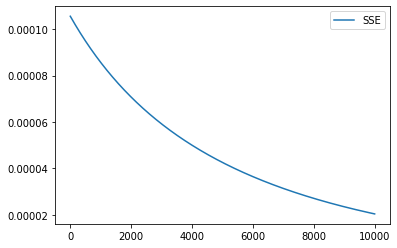

In [12]:
pd.DataFrame (errList, columns=['SSE']).plot()